# **Finding the Best Features for Predicting Fuel Consumption of vehicles**

## **Table of Contents**

  * [Data Set Information: Fuel Consumption Data Set](#Information)<br></br>
  * [Load the Fuel Consumption dataset](#Dataset)<br></br>
  * [Data Exploration](#EDA)<br></br>
  * [Data Preprocessing](#Preprocessing)<br></br>
  * [Building Linear Regression Model](#Building)<br></br>
  * [Model Development](#Model)<br></br>
  * [Model Enhancement](#Enhancement)
    


### **Import Libraries & Primary modules**

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

## **Dataset Information** <a name="DatasetInformation"></a>
Datasets provide model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

**Model:**

* 4WD/4X4 = Four-wheel drive
* AWD = All-wheel drive
* FFV = Flexible-fuel vehicle
* SWB = Short wheelbase
* LWB = Long wheelbase
* EWB = Extended wheelbase

**Transmission:**
* A = automatic
* AM = automated manual
* AS = automatic with select shift
* AV = continuously variable
* M = manual
* 3 – 10 = Number of gears

**Fuel type:**
* X = regular gasoline
* Z = premium gasoline
* D = diesel
* E = ethanol (E85)
* N = natural gas

**Fuel consumption:** City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)

**CO2 emissions:** the tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

**CO2 rating:** the tailpipe emissions of carbon dioxide rated on a scale from 1 (worst) to 10 (best)

**Smog rating:** the tailpipe emissions of smog-forming pollutants rated on a scale from 1 (worst) to 10 (best)

## **Load the Fuel Consumption dataset**<a name = "Dataset"></a>

In [8]:
df = pd.read_csv(r"C:\Users\Priyanshu\Desktop\New_GHG\Fuel_consumption.csv")
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


## **Data Exploration**<a name="EDA"></a>

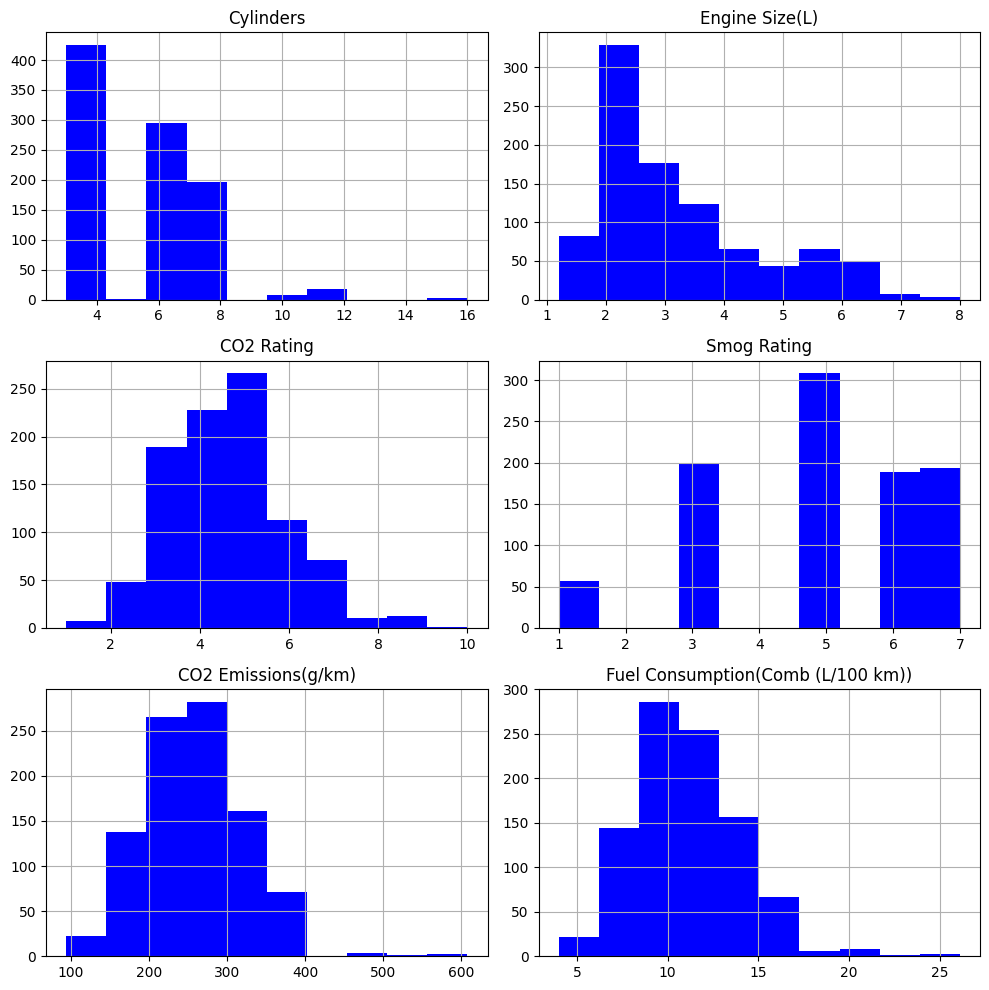

In [9]:
viz = df[['Cylinders','Engine Size(L)','CO2 Rating', 'Smog Rating','CO2 Emissions(g/km)','Fuel Consumption(Comb (L/100 km))']]
viz.hist(color = 'Blue', figsize = (10, 10))
plt.tight_layout();
plt.show();

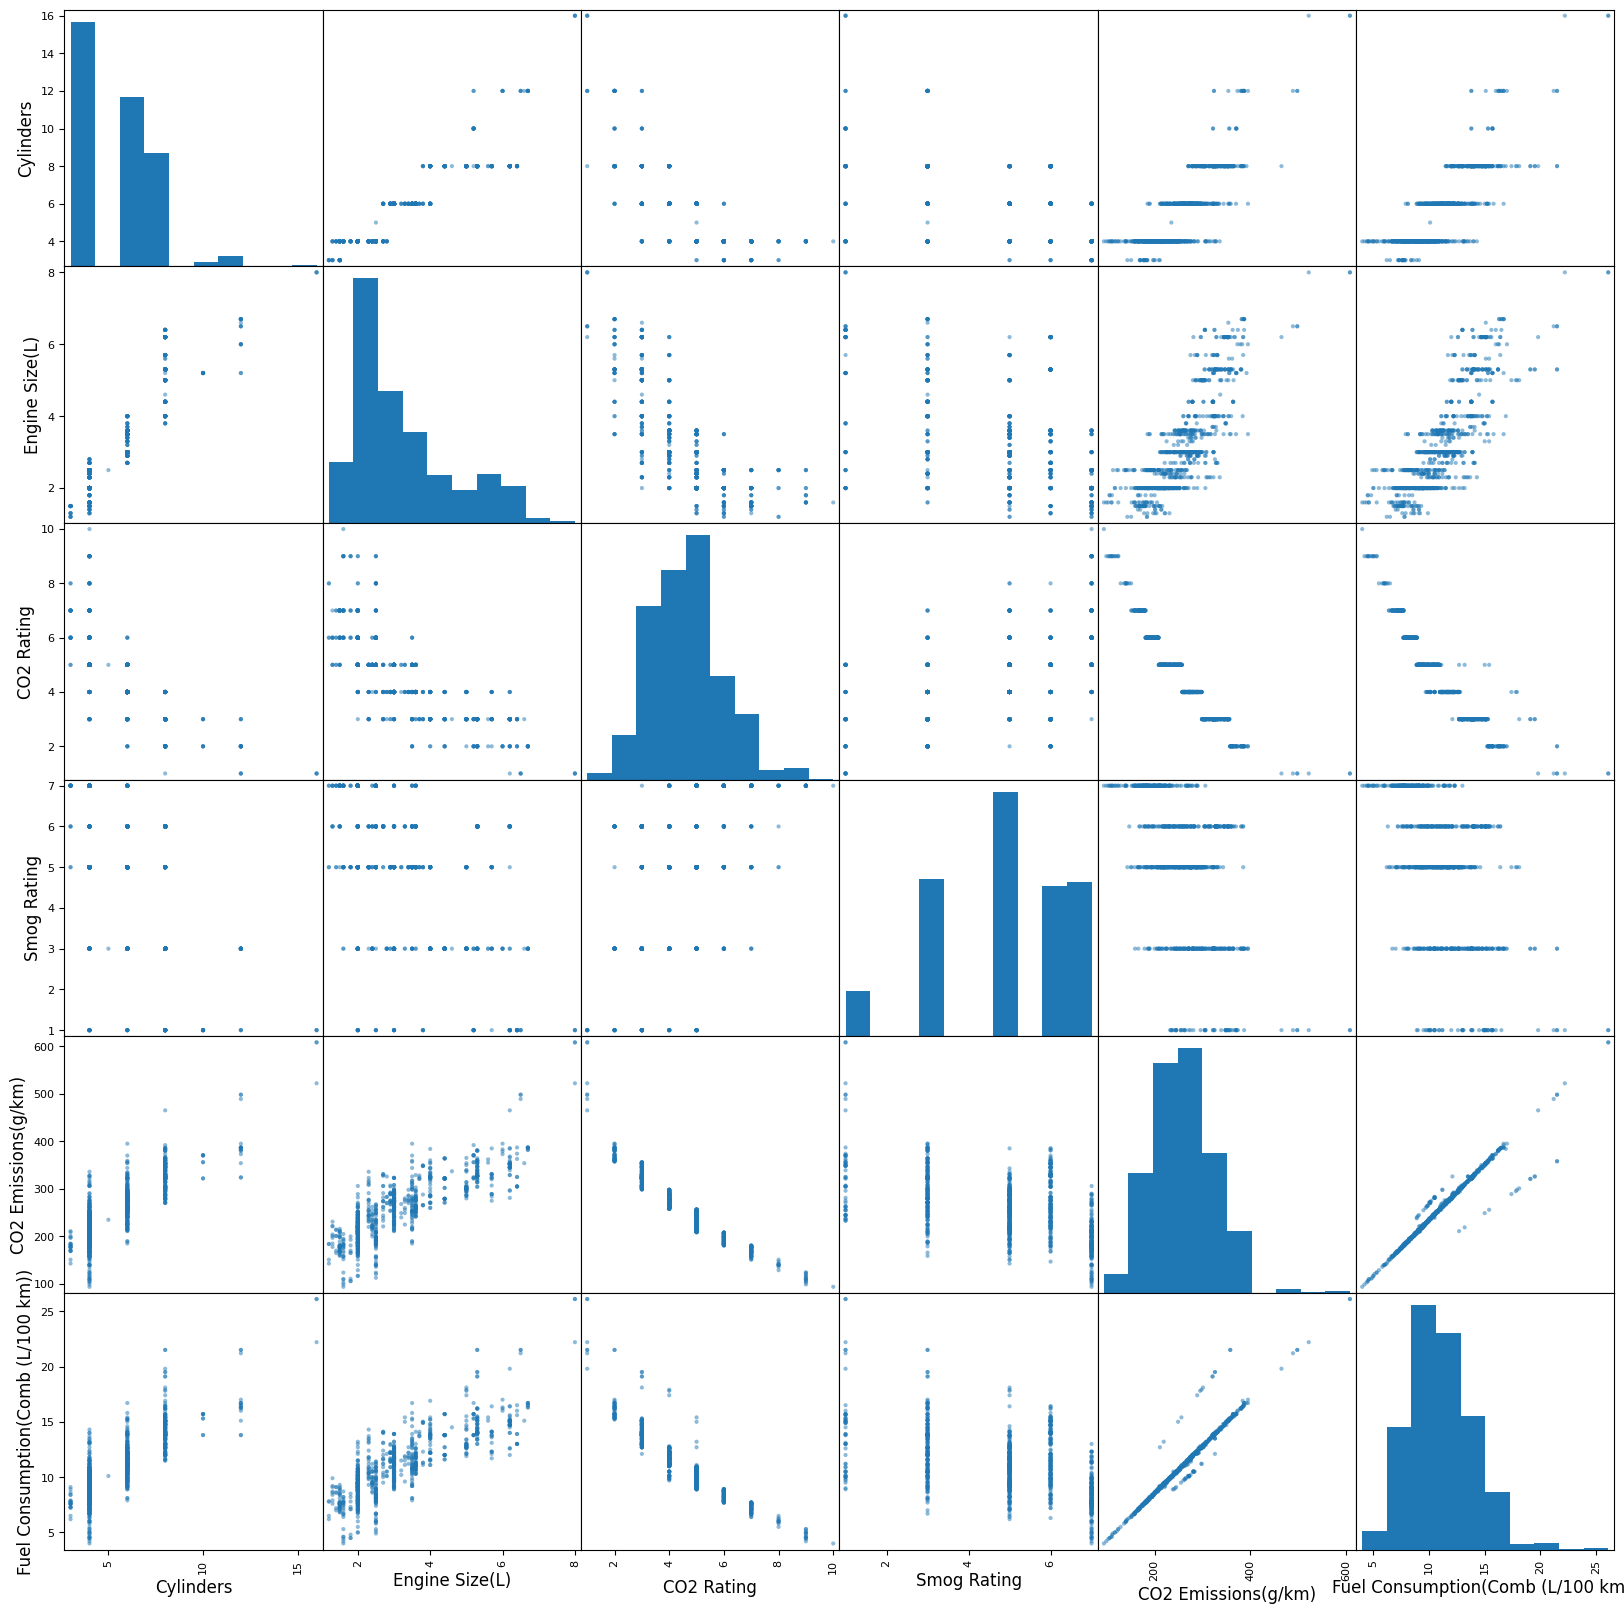

In [10]:
from pandas.plotting import scatter_matrix
#set font of all elements to size 15
plt.rc('font', size=12)
scatter_matrix(df[['Cylinders','Engine Size(L)','CO2 Rating', 'Smog Rating','CO2 Emissions(g/km)','Fuel Consumption(Comb (L/100 km))']], figsize=(20, 20))
plt.tight_layout;
plt.show()

c:\Users\Priyanshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=x, y=y, **kwargs)
c:\Users\Priyanshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=x, y=y, **kwargs)
c:\Users\Priyanshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=x, y=y, **kwargs)
c:\Users\Priyanshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: FutureWarning: 

`shade` is now depreca

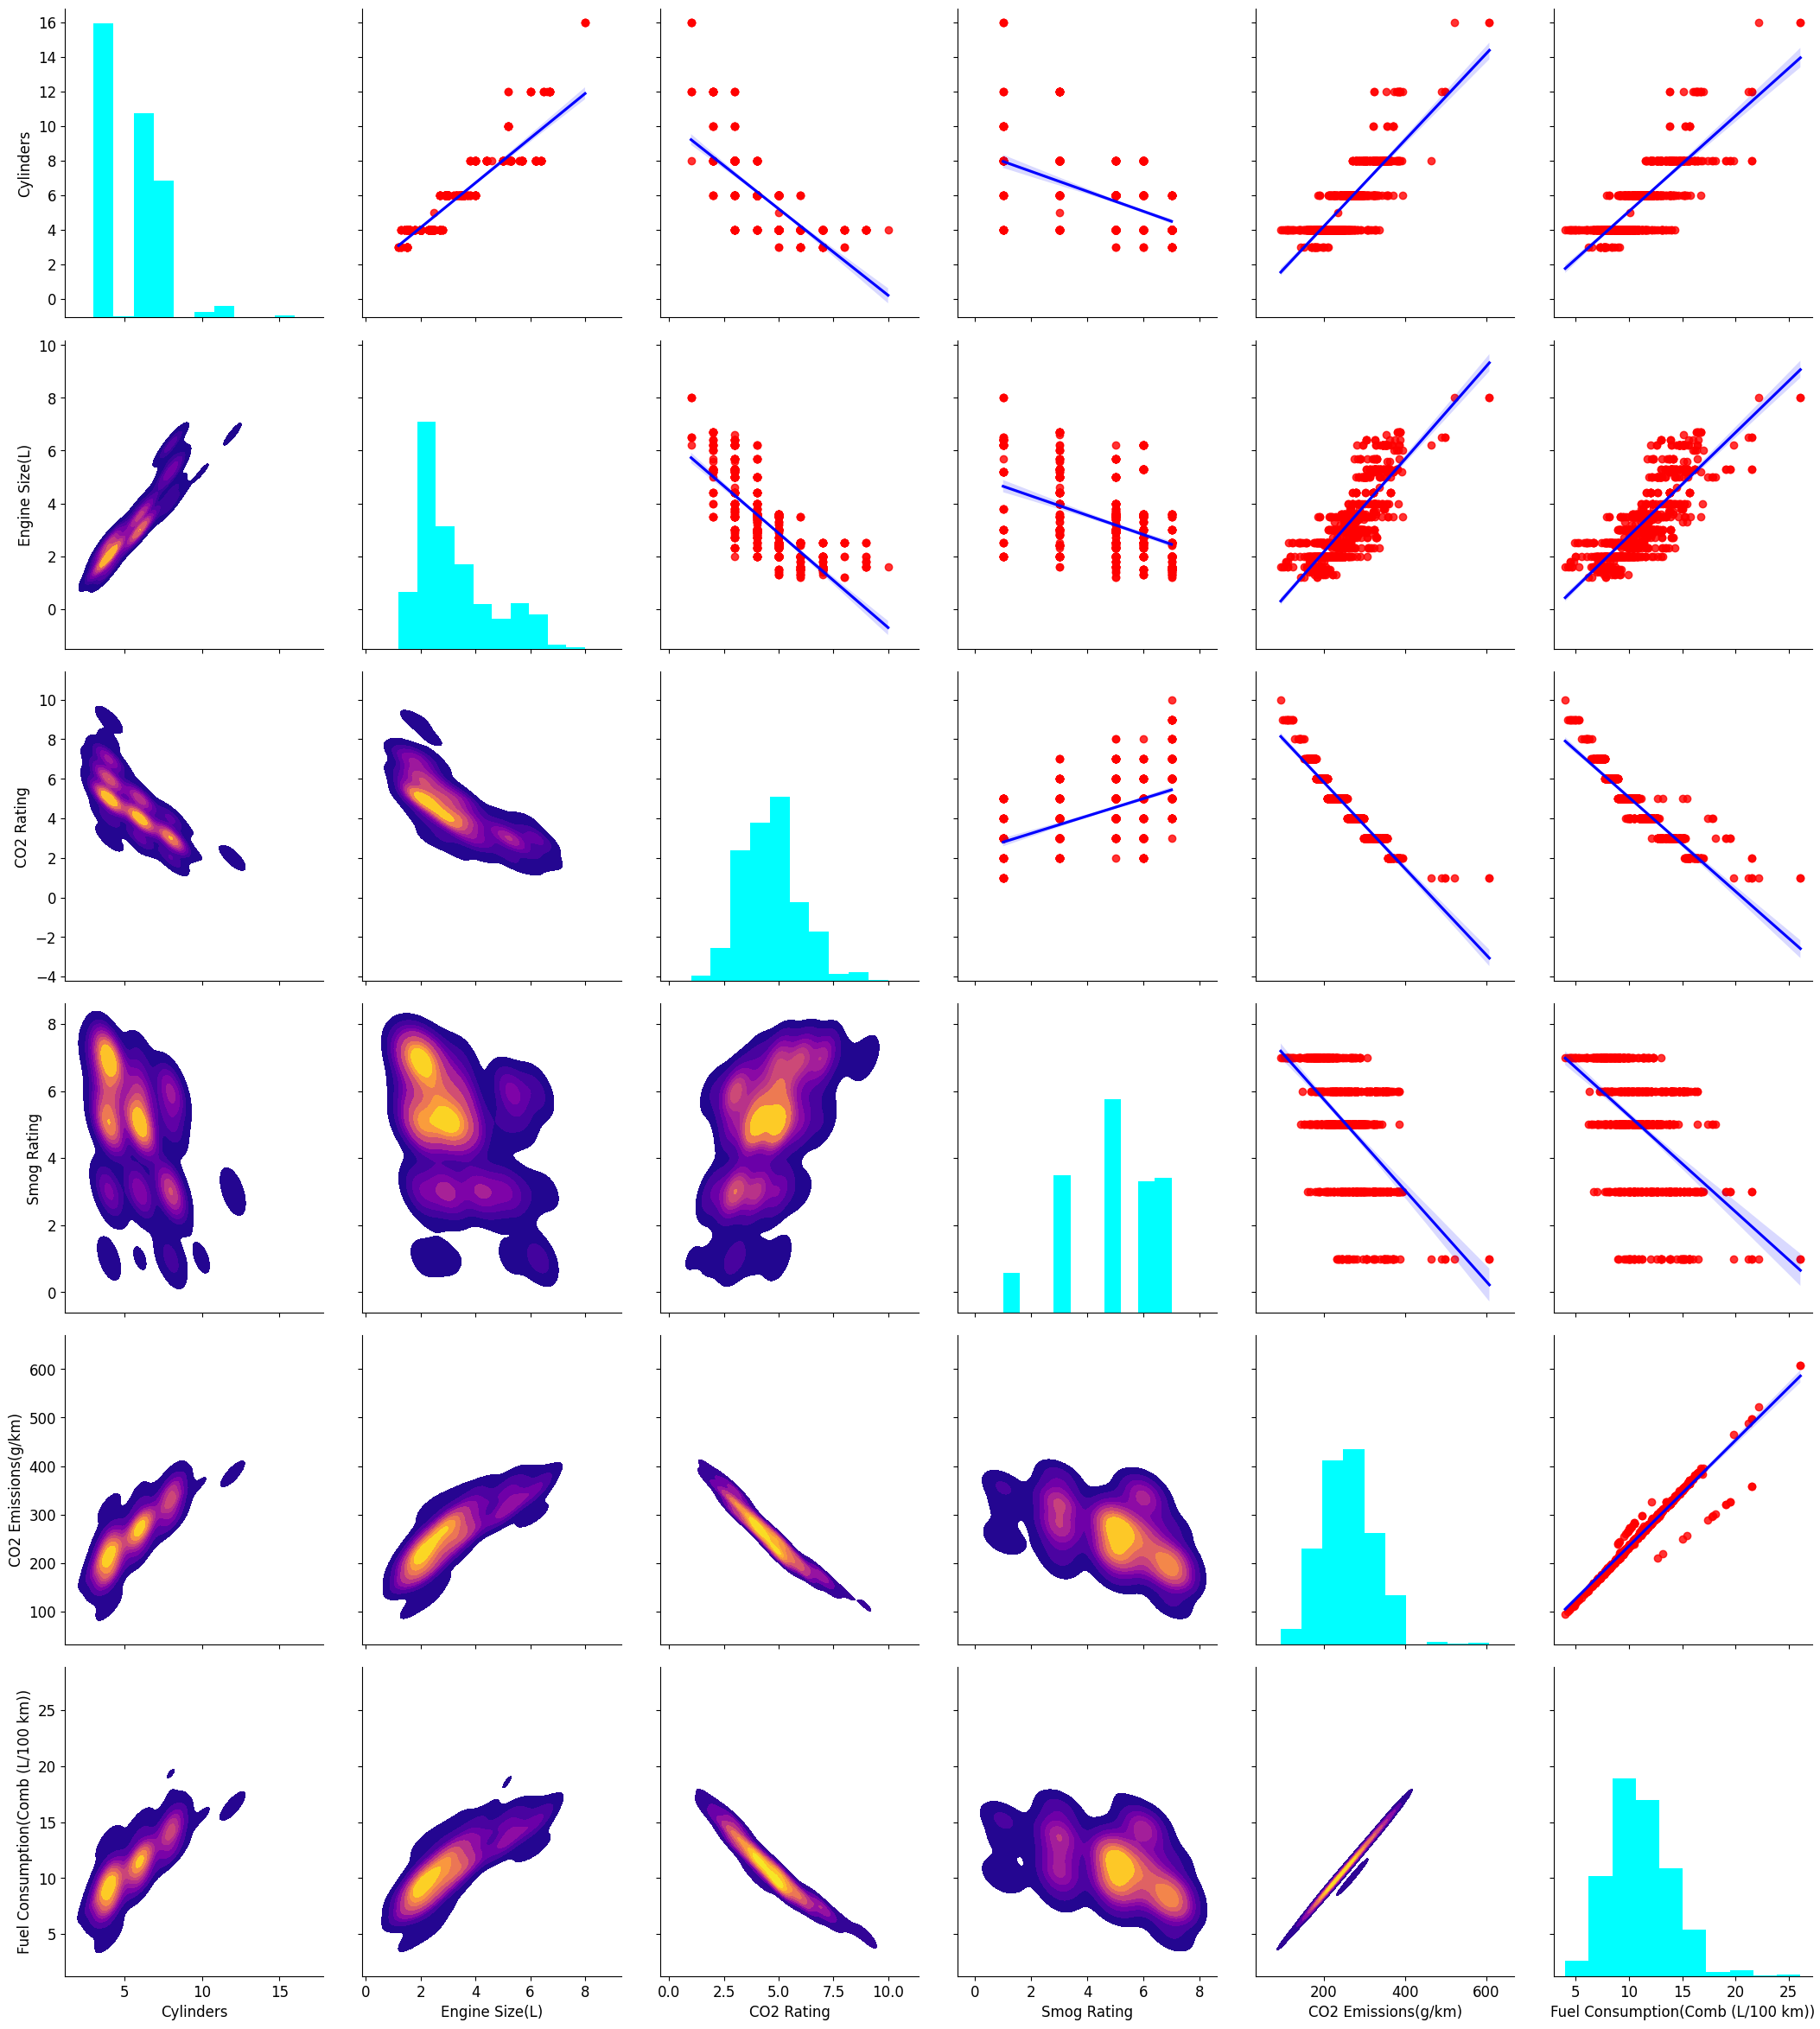

In [11]:
g = sns.PairGrid(df[['Cylinders','Engine Size(L)','CO2 Rating', 'Smog Rating','CO2 Emissions(g/km)','Fuel Consumption(Comb (L/100 km))']], height=4, aspect=0.9)
g.map_upper(sns.regplot,scatter_kws={"color": "red"}, line_kws={"color": "blue"})
g.map_lower(sns.kdeplot, cmap="plasma", shade=True, thresh=0.05)
g.map_diag(plt.hist,color = 'cyan')
plt.tight_layout;
plt.show();

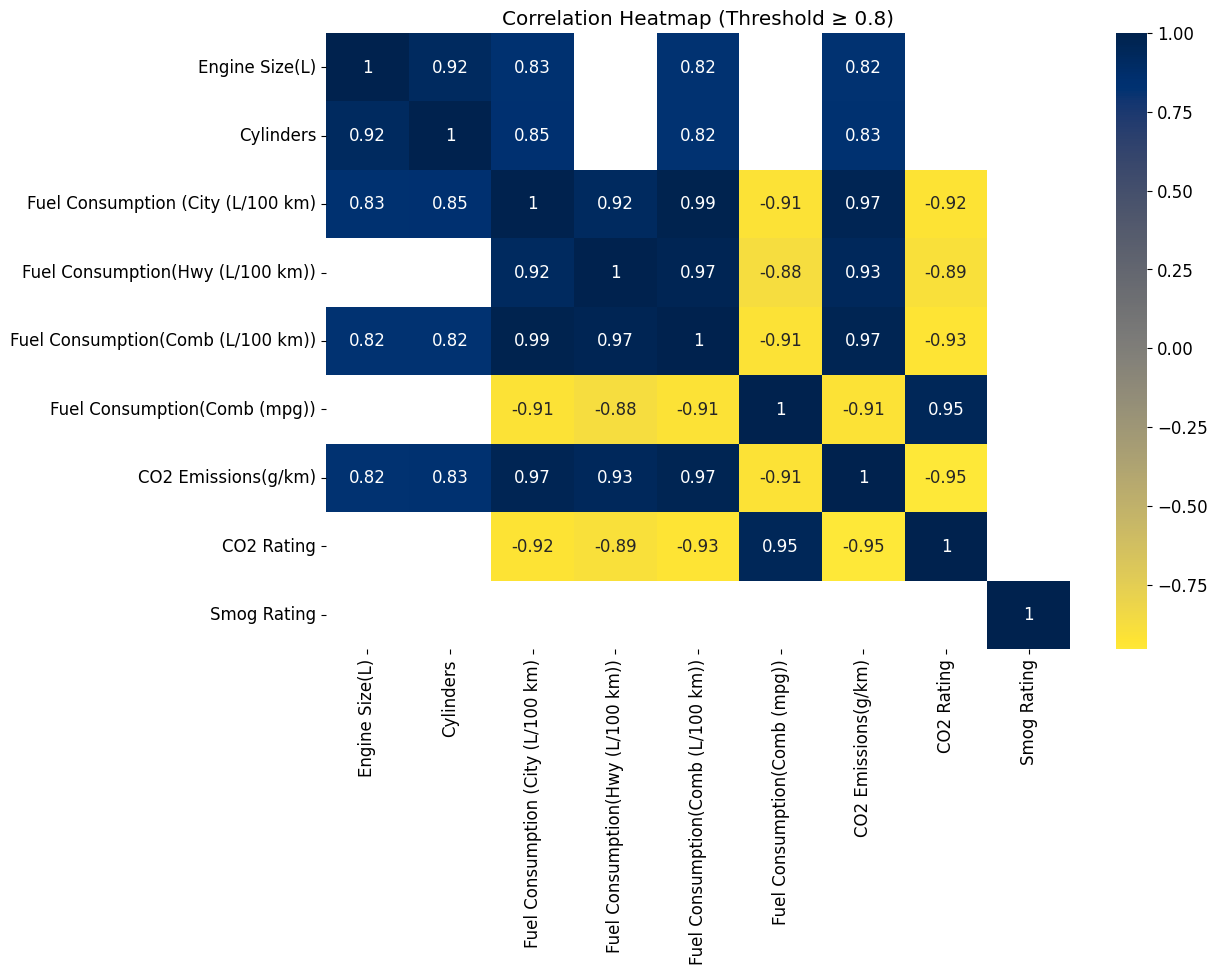

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv(r"C:\Users\Priyanshu\Desktop\New_GHG\Fuel_consumption.csv")

# Drop non-numeric columns and compute correlation matrix
df_numeric = df.select_dtypes(include=['number'])  # Select numeric columns only
corr = df_numeric.drop(['Model Year'], axis=1).corr()  # Drop 'Model Year' column

# Filter correlations with absolute values >= 0.8
corr_top = corr[abs(corr) >= 0.8]

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_top, cmap="cividis_r", annot=True)
plt.title("Correlation Heatmap (Threshold ≥ 0.8)")
plt.show()

### **P-value:**

In statistical analysis P-value is used to know the significance of the correlation estimate.The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.
By convention, when the
* p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.
* p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.
* p-value is $<$ 0.1: there is weak evidence that the correlation is significant.
* p-value is $>$ 0.1: there is no evidence that the correlation is significant.

This information is obtained using "stats" module in the "scipy" library.

In [16]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['CO2 Emissions(g/km)'], df['Fuel Consumption(Comb (L/100 km))'])
print("The Pearson Correlation Coefficient of CO2 Emissions(g/km) vs Fuel Consumption(Comb (L/100 km)) is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(df['CO2 Rating'], df['Fuel Consumption(Comb (L/100 km))'])
print("The Pearson Correlation Coefficient of CO2 Rating vs Fuel Consumption(Comb (L/100 km)) is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(df['Smog Rating'], df['Fuel Consumption(Comb (L/100 km))'])
print("The Pearson Correlation Coefficient of Smog Rating vs Fuel Consumption(Comb (L/100 km)) is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(df['Cylinders'], df['Fuel Consumption(Comb (L/100 km))'])
print("The Pearson Correlation Coefficient of Cylinders vs  Combined City & Highway Fuel Consumption is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(df['Engine Size(L)'], df['Fuel Consumption(Comb (L/100 km))'])
print("The Pearson Correlation Coefficient Engine Size vs Combined City & Highway Fuel Consumption is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient of CO2 Emissions(g/km) vs Fuel Consumption(Comb (L/100 km)) is 0.9716713467737115  with a P-value of P = 0.0
The Pearson Correlation Coefficient of CO2 Rating vs Fuel Consumption(Comb (L/100 km)) is -0.9277052249486769  with a P-value of P = 0.0
The Pearson Correlation Coefficient of Smog Rating vs Fuel Consumption(Comb (L/100 km)) is -0.49047296671462276  with a P-value of P = 2.0615615117316637e-58
The Pearson Correlation Coefficient of Cylinders vs  Combined City & Highway Fuel Consumption is 0.8217180823738502  with a P-value of P = 9.314329241219007e-233
The Pearson Correlation Coefficient Engine Size vs Combined City & Highway Fuel Consumption is 0.818693533620138  with a P-value of P = 1.1982886562213604e-229


### **ANOVA: Analysis of Variance**
The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA can be used to find the correlation between different groups of a categorical variable. 

ANOVA returns two parameters:

* F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. The F-test calculates the ratio of variation between groups means over the variation within each of the sample group means.  A larger score means there is a larger difference between the means.
* P-value: P-value tells how statistically significant is our calculated score value.
If the emission variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.
Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.

#### **Fuel Consumption vs No. of Cylinders**

C:\Users\Priyanshu\AppData\Local\Temp\ipykernel_12428\690544181.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cylinders", y="Fuel Consumption(Comb (L/100 km))", data=df,palette="Blues", showmeans=True,


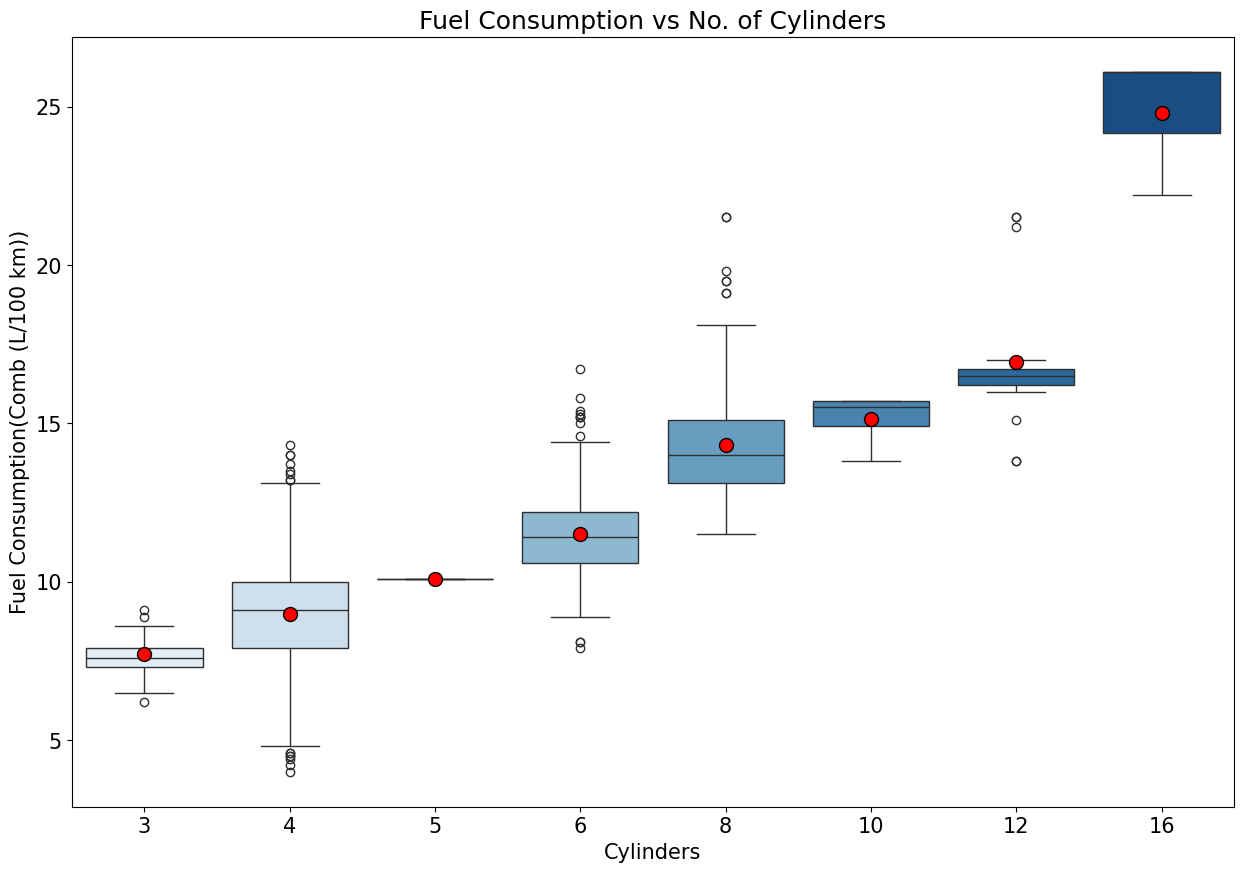

In [17]:
plt.figure(figsize=(15,10))
#set font of all elements to size 15
plt.rc('font', size=15) 
sns.boxplot(x="Cylinders", y="Fuel Consumption(Comb (L/100 km))", data=df,palette="Blues", showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"Red", "markeredgecolor":"black","markersize":"10"})
plt.title ("Fuel Consumption vs No. of Cylinders");

In [18]:
# ANOVA
# Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.
from scipy import stats
stats.f_oneway(df['Fuel Consumption(Comb (L/100 km))'][df['Cylinders'] == 3],
               df['Fuel Consumption(Comb (L/100 km))'][df['Cylinders'] == 4],
               df['Fuel Consumption(Comb (L/100 km))'][df['Cylinders'] == 5],
               df['Fuel Consumption(Comb (L/100 km))'][df['Cylinders'] == 6],
               df['Fuel Consumption(Comb (L/100 km))'][df['Cylinders'] == 8],
               df['Fuel Consumption(Comb (L/100 km))'][df['Cylinders'] == 10],
               df['Fuel Consumption(Comb (L/100 km))'][df['Cylinders'] == 12],
               df['Fuel Consumption(Comb (L/100 km))'][df['Cylinders'] == 16])

F_onewayResult(statistic=np.float64(296.22851380362664), pvalue=np.float64(1.4571126324641679e-232))

#### **Fuel Consumption vs Vehicle Class**

C:\Users\Priyanshu\AppData\Local\Temp\ipykernel_12428\748425022.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Vehicle Class", y="Fuel Consumption(Comb (L/100 km))", data=df,palette="Greens", showmeans=True,


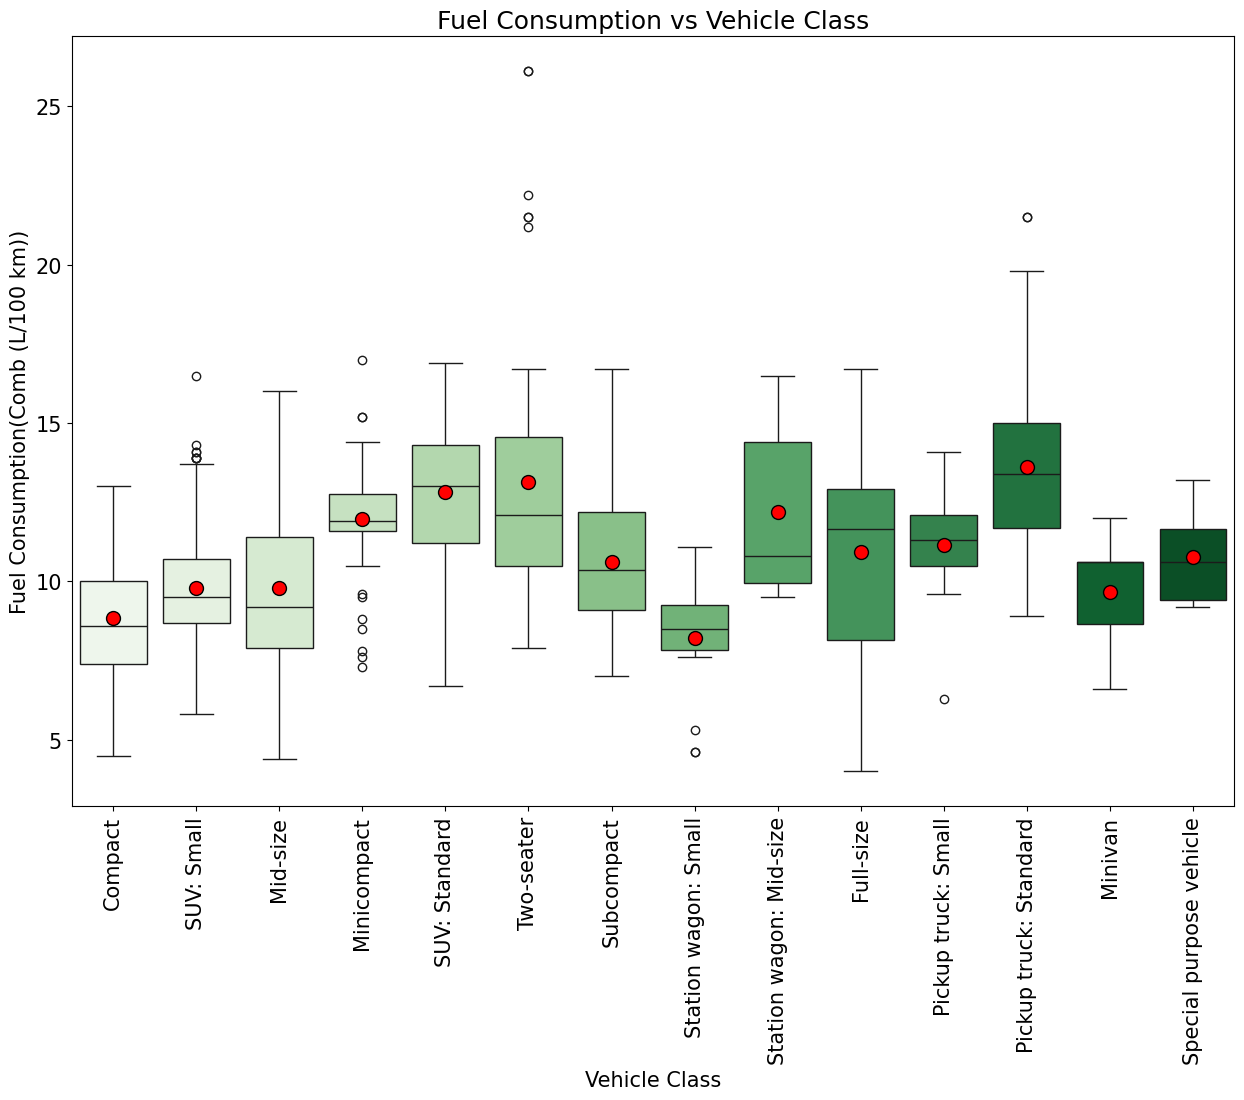

In [19]:
plt.figure(figsize=(15,10))
#set font of all elements to size 15
plt.rc('font', size=15) 
sns.boxplot(x="Vehicle Class", y="Fuel Consumption(Comb (L/100 km))", data=df,palette="Greens", showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"Red", "markeredgecolor":"black","markersize":"10"})
plt.xticks(rotation=90)
plt.title ("Fuel Consumption vs Vehicle Class");

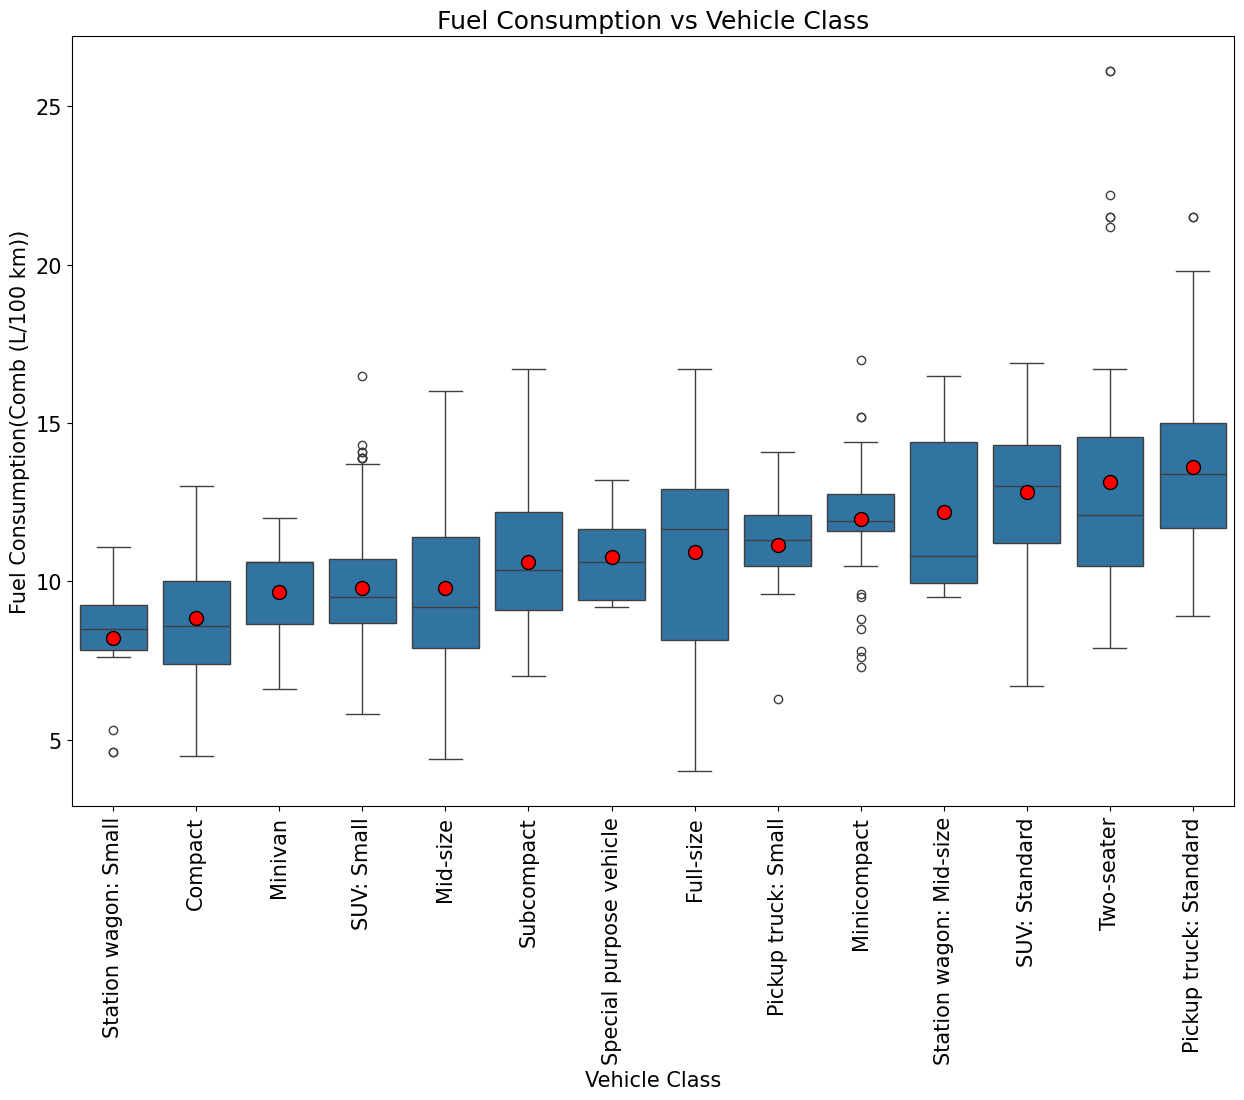

In [20]:
sorted = df[['Vehicle Class', 'Fuel Consumption(Comb (L/100 km))']].groupby("Vehicle Class").mean()
sorted = sorted.sort_values('Fuel Consumption(Comb (L/100 km))')
sorted_index = sorted.index
plt.figure(figsize=(15,10))
#set font of all elements to size 15
plt.rc('font', size=15) 
plt.xticks(rotation=90)
sns.boxplot(x="Vehicle Class", y="Fuel Consumption(Comb (L/100 km))", data=df,showmeans=True, order=sorted_index, 
            meanprops={"marker":"o", "markerfacecolor":"Red", "markeredgecolor":"black","markersize":"10"})
plt.title ("Fuel Consumption vs Vehicle Class");

In [21]:
# ANOVA
# Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.
stats.f_oneway(df['Fuel Consumption(Comb (L/100 km))'][df['Vehicle Class'] == 'SUV: Small'],
               df['Fuel Consumption(Comb (L/100 km))'][df['Vehicle Class'] == 'SUV: Standard'],
               df['Fuel Consumption(Comb (L/100 km))'][df['Vehicle Class'] == 'Mid-size'],
               df['Fuel Consumption(Comb (L/100 km))'][df['Vehicle Class'] == 'Pickup truck: Standard'],
               df['Fuel Consumption(Comb (L/100 km))'][df['Vehicle Class'] == 'Subcompact'],
               df['Fuel Consumption(Comb (L/100 km))'][df['Vehicle Class'] == 'Compact'],
               df['Fuel Consumption(Comb (L/100 km))'][df['Vehicle Class'] == 'Full-size'],
               df['Fuel Consumption(Comb (L/100 km))'][df['Vehicle Class'] == 'Two-seater'],
               df['Fuel Consumption(Comb (L/100 km))'][df['Vehicle Class'] == 'Minicompact'],
               df['Fuel Consumption(Comb (L/100 km))'][df['Vehicle Class'] == 'Pickup truck: Small'],
               df['Fuel Consumption(Comb (L/100 km))'][df['Vehicle Class'] == 'Station wagon: Small'],
               df['Fuel Consumption(Comb (L/100 km))'][df['Vehicle Class'] == 'Special purpose vehicle'],
               df['Fuel Consumption(Comb (L/100 km))'][df['Vehicle Class'] == 'Station wagon: Mid-size'],
               df['Fuel Consumption(Comb (L/100 km))'][df['Vehicle Class'] == 'Minivan'])

F_onewayResult(statistic=np.float64(32.998441442030845), pvalue=np.float64(7.241914171711257e-68))

#### **Fuel Consumption vs Fuel Type**

C:\Users\Priyanshu\AppData\Local\Temp\ipykernel_12428\468248330.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Fuel Type", y="Fuel Consumption(Comb (L/100 km))", data=df,showmeans=True, palette = 'hsv', order=sorted_index,


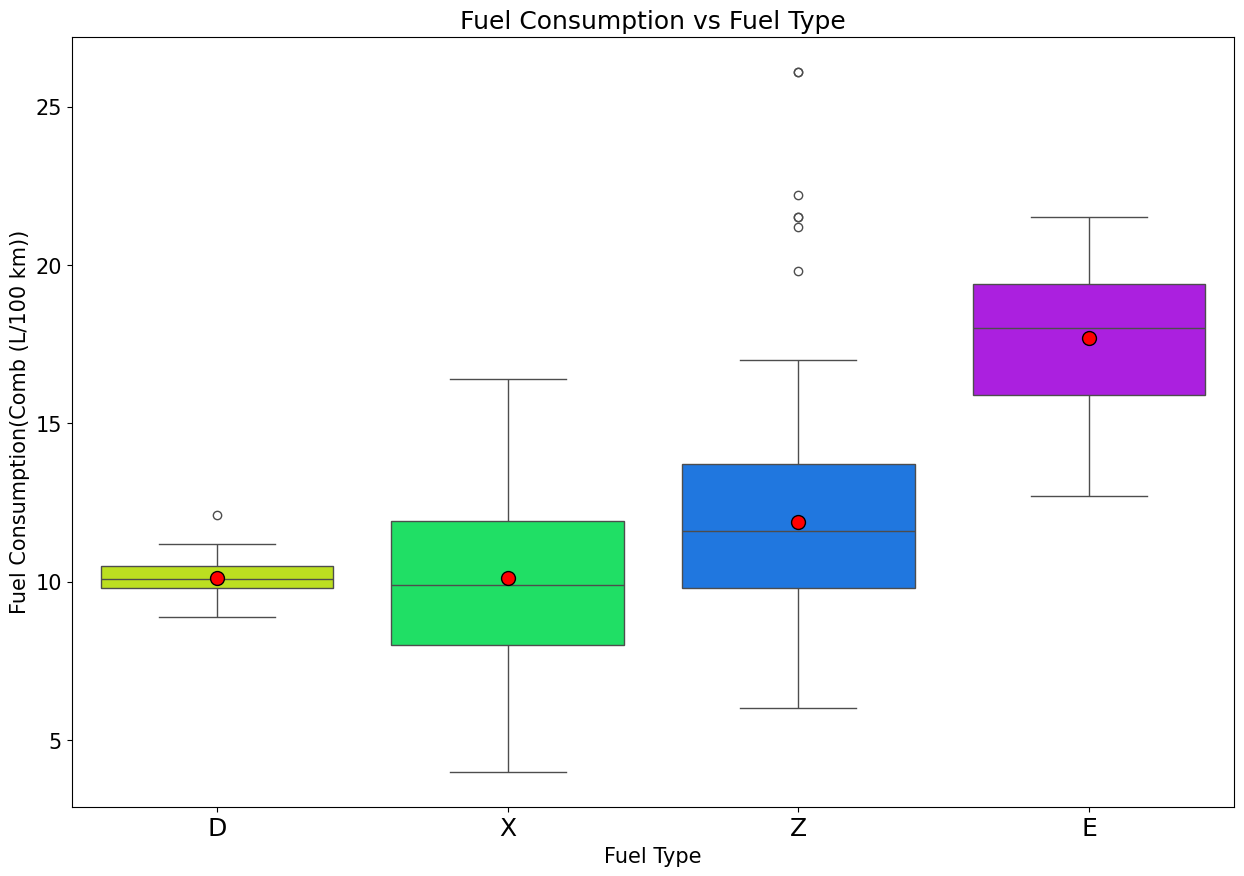

In [22]:
sorted = df[['Fuel Type', 'Fuel Consumption(Comb (L/100 km))']].groupby("Fuel Type").mean()
sorted = sorted.sort_values('Fuel Consumption(Comb (L/100 km))')
sorted_index = sorted.index

plt.figure(figsize=(15,10))
#set font of all elements to size 15
plt.rc('font', size=15) 
plt.xticks(rotation=0, size = 18)
sns.boxplot(x="Fuel Type", y="Fuel Consumption(Comb (L/100 km))", data=df,showmeans=True, palette = 'hsv', order=sorted_index, 
            meanprops={"marker":"o", "markerfacecolor":"Red", "markeredgecolor":"black","markersize":"10"})
plt.title ("Fuel Consumption vs Fuel Type");

In [23]:
# ANOVA
# Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.
stats.f_oneway(df['Fuel Consumption(Comb (L/100 km))'][df['Fuel Type'] == 'X'],
               df['Fuel Consumption(Comb (L/100 km))'][df['Fuel Type'] == 'D'],
               df['Fuel Consumption(Comb (L/100 km))'][df['Fuel Type'] == 'Z'],
               df['Fuel Consumption(Comb (L/100 km))'][df['Fuel Type'] == 'E'])

F_onewayResult(statistic=np.float64(65.34018094901431), pvalue=np.float64(2.1920897177077466e-38))

#### **Fuel Consumption vs Transmission**

C:\Users\Priyanshu\AppData\Local\Temp\ipykernel_12428\2464097599.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Transmission", y="Fuel Consumption(Comb (L/100 km))", data=df,showmeans=True, palette = 'rainbow', order=sorted_index,


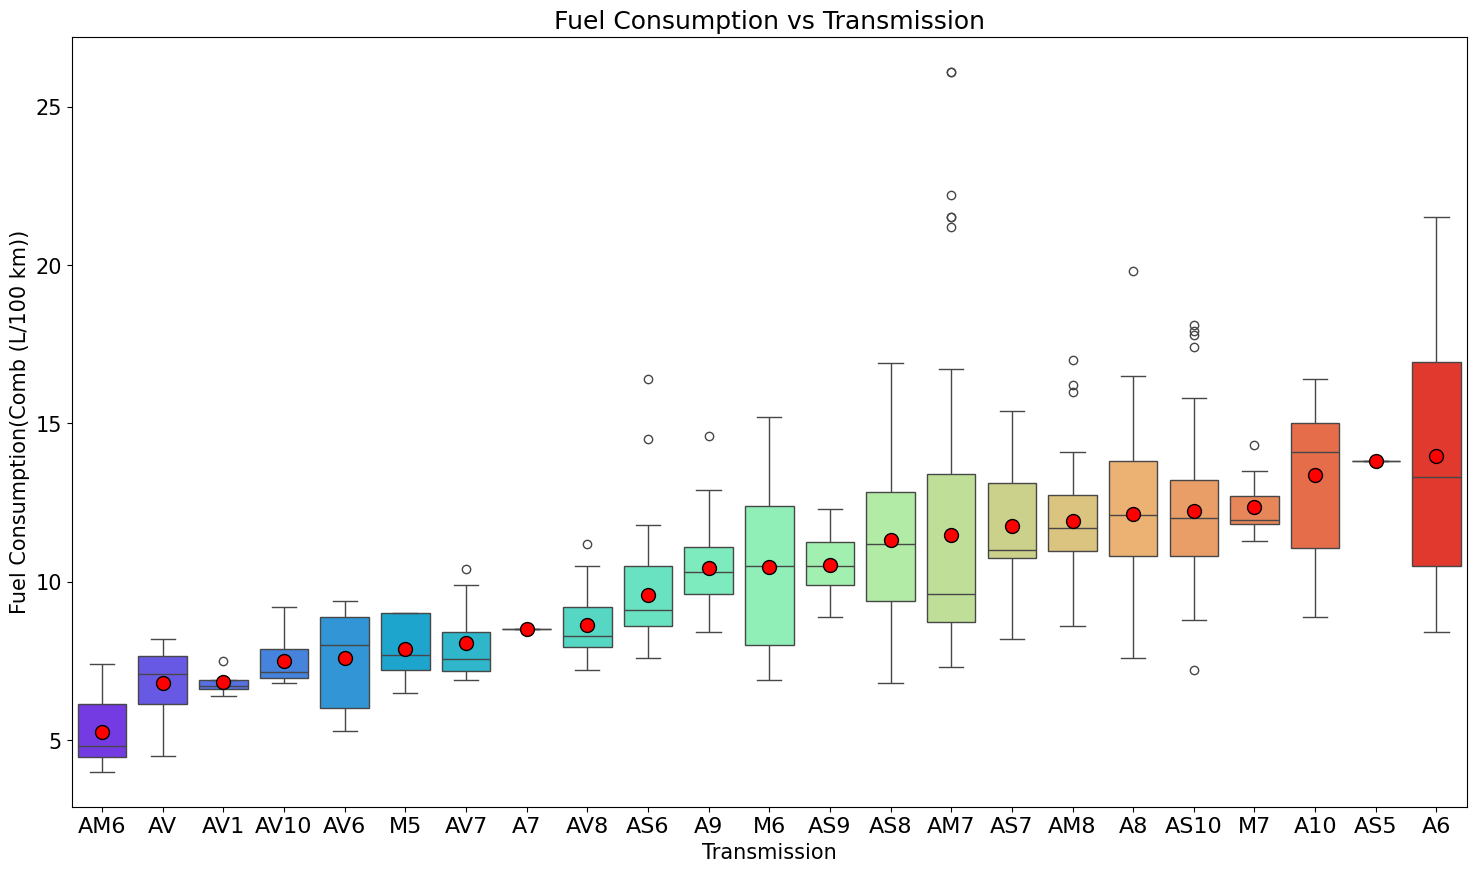

In [24]:
sorted = df[['Transmission', 'Fuel Consumption(Comb (L/100 km))']].groupby("Transmission").mean()
sorted = sorted.sort_values('Fuel Consumption(Comb (L/100 km))')
sorted_index = sorted.index

plt.figure(figsize=(18,10))
#set font of all elements to size 15
plt.rc('font', size=15) 
plt.xticks(rotation=0, size = 16)
sns.boxplot(x="Transmission", y="Fuel Consumption(Comb (L/100 km))", data=df,showmeans=True, palette = 'rainbow', order=sorted_index, 
            meanprops={"marker":"o", "markerfacecolor":"Red", "markeredgecolor":"black","markersize":"10"})
plt.title ("Fuel Consumption vs Transmission");

### **Residual Plot**

A good way to visualize the variance of the data is to use a residual plot. A good way to visualize the variance of the data is to use a residual plot. 

**Residuals**
The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

Pay attention to the spread of the residuals when looking at a residual plot:
- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data. Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

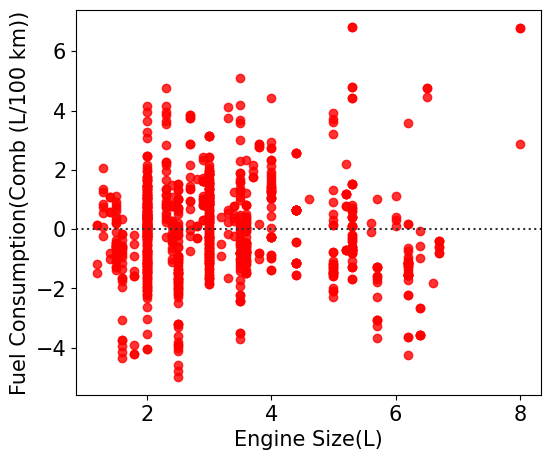

In [25]:
plt.figure(figsize=((6,5)))
#set font of all elements to size 15
plt.rc('font', size=15) 
sns.residplot(x = 'Engine Size(L)', y = 'Fuel Consumption(Comb (L/100 km))', data = df, color = 'Red')
plt.show();

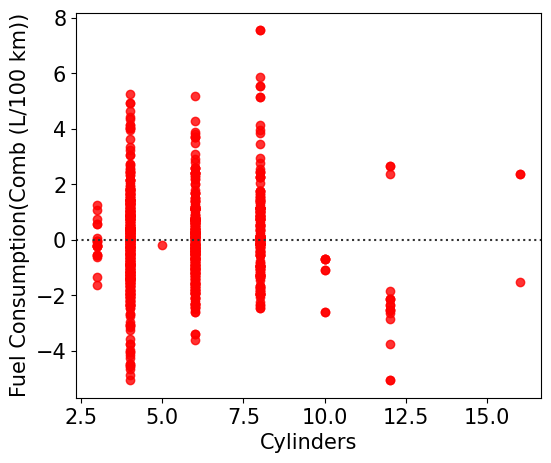

In [26]:
plt.figure(figsize=((6,5)))
sns.residplot(x = 'Cylinders', y = 'Fuel Consumption(Comb (L/100 km))', data = df, color = 'Red')
plt.show();

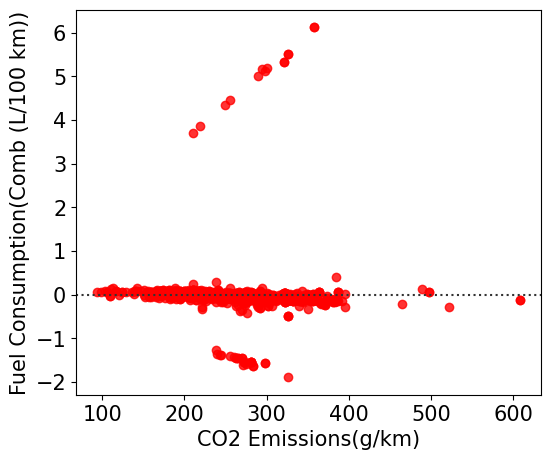

In [27]:
plt.figure(figsize=((6,5)))
#set font of all elements to size 15
plt.rc('font', size=15) 
sns.residplot(x = 'CO2 Emissions(g/km)', y = 'Fuel Consumption(Comb (L/100 km))', data = df, color = 'Red')
plt.show();

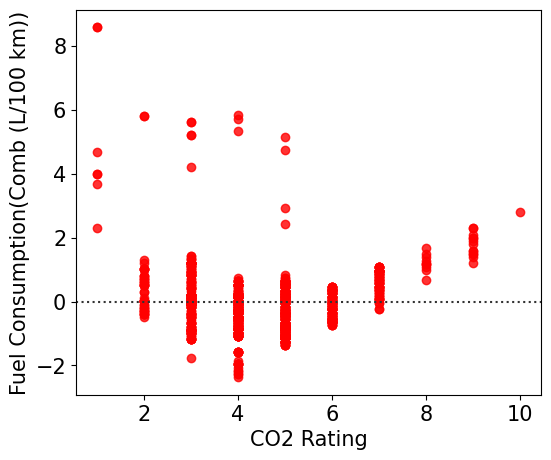

In [28]:
plt.figure(figsize=((6,5)))
#set font of all elements to size 15
plt.rc('font', size=15) 
sns.residplot(x = 'CO2 Rating', y = 'Fuel Consumption(Comb (L/100 km))', data = df, color = 'Red')
plt.show();

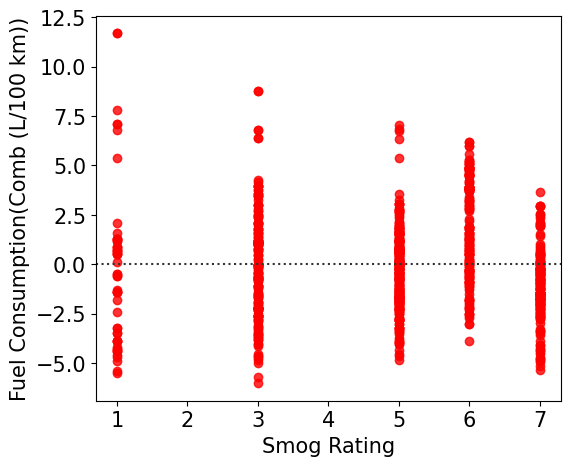

In [29]:
plt.figure(figsize=((6,5)))
#set font of all elements to size 15
plt.rc('font', size=15) 
sns.residplot(x = 'Smog Rating', y = 'Fuel Consumption(Comb (L/100 km))', data = df, color = 'Red')
plt.show();

Residual plots show that linear model is better than non linear models for this data. 

## **Data Preprocessing**<a name = 'Preprocessing'></a>

### **Label Encoding**
Some features in this dataset are categorical such as Vehicle Class,Transmission, and Fuel Type. Unfortunately, Sklearn models do not handle categorical variables. To convert these features to numerical values, LabelEncoder from sklearn.preprocessing can be used to convert categorical variable into dummy/indicator variables.

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Vehicle Class'] = le.fit_transform(df['Vehicle Class'])
df['Transmission'] = le.fit_transform(df['Transmission'])
df['Fuel Type'] = le.fit_transform(df['Fuel Type'])

## **Building Linear Regression Model**<a name ='Building'></a>
When a dependent variable is predicted with more than one independent variable, the method is termed as multiple linear regression. 

Scikit-learn uses plain Ordinary Least Squares method to find parameters like the intercept and coefficients of hyperplane. 

**Ordinary Least Squares (OLS)**

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and the predicted output ( y^ ) over all samples in the dataset.

OLS can find the best parameters using of the following methods: - Solving the model parameters analytically using closed-form equations - Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

A final linear model with the structure should be obtained:
$$
\hat{y}=a + bx_1 + cx_2 + dx_3
$$

### **Cost Function & Gradient descent to find the best $theta$ values for a predictive model**
The multivariable form of the hypothesis function accommodating these multiple features is as follows:
<br>
$
h_\theta (x) = \theta_0 + \theta_1  x_1 + \theta_2 x_2 + \theta_3 x_3 + \cdots + \theta_n x_n
$
<br></br>
$
Parameters : \theta_0, \theta_1,  \theta_2,  \theta_3,   \cdots  \theta_n 
$
<br></br>
The accuracy of the hypothesis function can be measured by using a cost function. This takes an average difference of all the results of the hypothesis with inputs from x's and the actual output y's. The objective of linear regression is to minimize the cost function.  Cost function is represented by the following equation.
<br>
$
J(\theta_0, \theta_1) = \frac {1}{2m}{\sum_{i=1} ^{m} (\hat{y_i} -y_i)^2} = \frac {1}{2m}{\sum_{i=1} ^{m} (h_\theta (x_i) -y_i)^2}
$
<br></br>
To break it apart, it is the mean of the squares of $ h_\theta (x_{i}) - y_{i} $, or the difference between the predicted value and the actual value. This function is otherwise called the "Squared error function", or "Mean squared error". The mean is halved $(\frac{1}{2})$ as a convenience for the computation of the gradient descent, as the derivative term of the square function will cancel out the $(\frac{1}{2})$ term.
<br></br>
The idea here is that the model get to choose the parameters theta 0, theta 1 so that h(x),meaning the value to be predicted on input x, is at least close to the values y for the examples in the training set. The parameters  $\theta_0, \theta_1,  \theta_2,  \theta_3,   \cdots  \theta_n$  are the values to be  adjusted to minimize cost function.
<br></br>
One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update. The goal is to minimize $J(\theta_0, \theta_1)$ by simultaneously updating each $\theta $ values after each gradient descent iterations. 
<br></br>
***To summarize:***
<br>
* **Hypothesis:**
<ul>
    $
h_\theta (x) = \theta_0 + \theta_1  x $

</ul>

* **Parameters:**
<ul>
    $
\theta_0 + \theta_1
$
    
</ul>

* **Cost Function:** 
<ul>
$
J(\theta_0, \theta_1) = \frac {1}{2m}{\sum_{i=1} ^{m} (\hat{y_i} -y_i)^2} = \frac {1}{2m}{\sum_{i=1} ^{m} (h_\theta (x_i) -y_i)^2}
$

</ul>
  
* **Goal:** 
<ul>
minimize $ J(\theta_0, \theta_1)$
</ul>


#### **Parameter Learning**

Gradient Descent: a general algorithm used all over the place in ML

* Gradient $\frac{d}{d\theta_j} J(\theta_j)$ represents that when θ is moved + or − a unit, how much J will + or − correspondingly
* Since the goal is to decrease J, θ is updated  with partial gradient (partial unit of θ change) controlled by learning rate $(\alpha)$.
* Update all parameters at the same time (simultaneous updation) as given by the following equation , so that the cost function keeps same for all parameters in single round.
<br>
$\theta_1:=\theta_1-\alpha \frac{d}{d\theta_1} J(\theta_1)$<br></br>
$\theta_2:=\theta_2-\alpha \frac{d}{d\theta_2} J(\theta_2)$
<br>
.
<br>
.
<br>
,
<br>
$\theta_j:=\theta_j-\alpha \frac{d}{d\theta_j} J(\theta_j)$  (simoultaneously update $\theta_j$ for all values of j.

With each step of gradient descent, the parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost .


Regardless of the slope's sign for $ (\frac{d}{d\theta_j} J(\theta_j))$ eventually converges to its minimum value. When the slope is negative, the value of $\theta_j$ increases and when it is positive, the value of $\theta_j$ decreases.

* If slope is +ve : θj = θj – (+ve value). Hence value of θj decreases.

* If slope is -ve : θj = θj – (-ve value). Hence value of θj increases.

**Gradient Descent of Linear Regression**

* It is always a convex function without local optima

* Batch Gradient Descent: consider all training examples when doing gradient descent

Parameter learning by gradient descent to minimize cost function on features generated using some random values are illustrated below:

### **Illustration of Gradient Descent of Simple Linear Regression using random values**

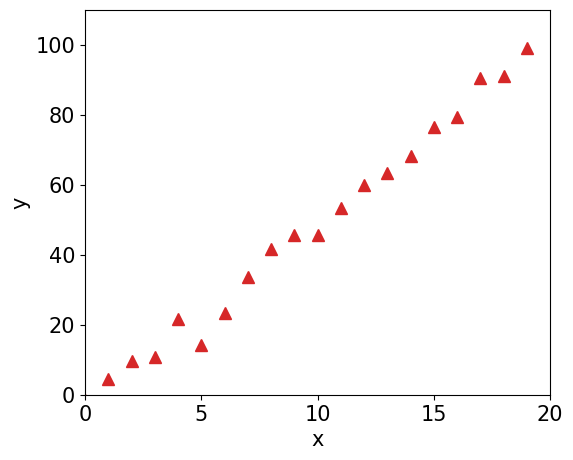

In [31]:
np.random.seed(15)
x = np.arange(20)
##You can adjust the slope and intercept to verify the changes in the graph
#y = 5*(x) + 2
y =  5*x + np.random.normal(0, 4, 20)
y_noise = 2 * np.random.normal(size=x.size)
y = y + y_noise
plt.figure(figsize=(6,5))
plt.plot(x, y, linestyle="", marker="^", markersize = 8, color="C3")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 20)
plt.ylim(0, 110);

In [32]:
def loss_function(theta, x, y):
    # h(x[i]) = theta * x[i]
    return (1/2* len(x)) * sum([(theta* x[i] - y[i])**2 for i in range(len(x))])

thetas = np.arange(0, 10, 0.5)
losses = loss_function(thetas, x, y)
losses

array([620117.39491459, 502800.04095237, 397832.68699015, 305215.33302792,
       224947.9790657 , 157030.62510348, 101463.27114126,  58245.91717904,
        27378.56321681,   8861.20925459,   2693.85529237,   8876.50133015,
        27409.14736793,  58291.79340571, 101524.43944348, 157107.08548126,
       225039.73151904, 305322.37755682, 397955.0235946 , 502937.66963237])

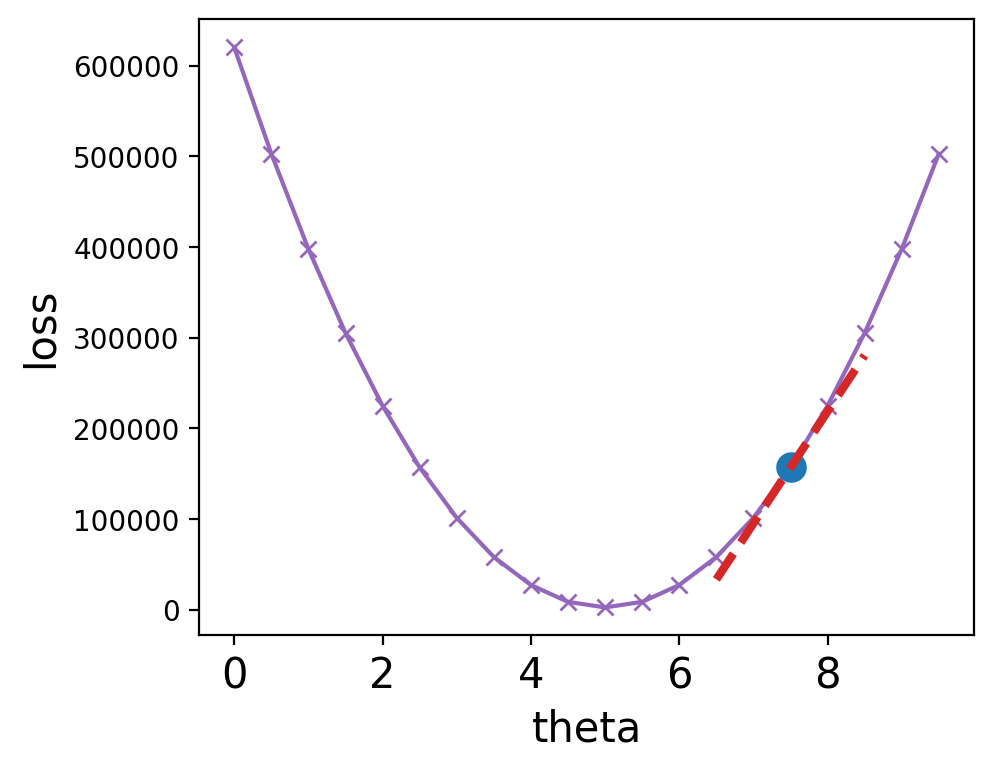

In [33]:
fig = plt.figure(figsize=(5,4), dpi = 200)
plt.plot(thetas, losses, linestyle="-", marker="x", color="C4")
plt.plot(thetas[15], losses[15], linestyle="", marker="o", color="C0", markersize = 10)

slope = (losses[16]-losses[14])/(thetas[16]-thetas[14])
xrange = np.linspace(-1, 1, 10)
plt.plot(xrange+thetas[15], slope*(xrange)+losses[15], 'C3--', linewidth = 3)
plt.xlabel("theta")
plt.ylabel("loss")
plt.yticks(rotation=0, size = 10)
plt.xlim()
plt.ylim();

### **Illustration of Gradient Descent of Simple Linear Regression using Engine size feature and Fuel Consumption target**

In [34]:
X = df[['Engine Size(L)']].values
y = df[['Fuel Consumption(Comb (L/100 km))']].values
X[0:5]

array([[2.4],
       [3.5],
       [2. ],
       [2. ],
       [2. ]])

**Visualization of Gradient descent**

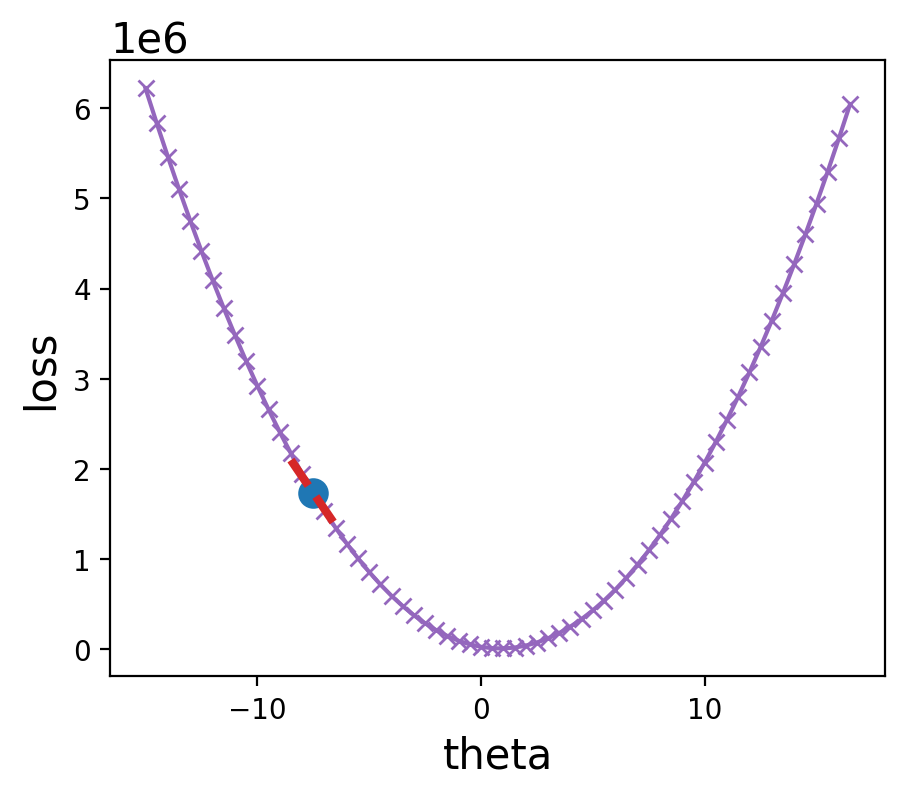

In [35]:
thetas = np.arange(-15, 17, 0.5)
losses = loss_function(thetas, x, y)
fig = plt.figure(figsize=(5,4), dpi = 200)
plt.plot(thetas, losses, linestyle="-", marker="x", color="C4")
plt.plot(thetas[15], losses[15], linestyle="", marker="o", color="C0", markersize = 10)

slope = (losses[20]-losses[14])/(thetas[20]-thetas[14])
xrange = np.linspace(-1, 1, 10)
plt.plot(xrange+thetas[15], slope*(xrange)+losses[15], 'C3--', linewidth = 3)
plt.xlabel("theta")
plt.ylabel("loss")
plt.xticks(rotation=0, size = 10)
plt.yticks(rotation=0, size = 10)
plt.xlim()
plt.ylim();

### **Parameter Learning**
**Steps involved in Parameter Learning**

Adding another dimension to the data by adding 1 to the column 1, (ie, $x_{0}^{(i)}$=1) to accommodate the  intercept term $\theta_0$ so that $\theta_0 * x_{0}^{(i)}$ = $\theta_0$.

In other words, for convenience reasons, just assume $x_{0}^{(i)} =1 \text{ for } (i\in { 1,\dots, m } ).$ This makes matrix operations with theta and x easier. Hence making the two vectors $\theta$ and $x^{(i)}$ match each other element-wise (that is, have the same number of elements: n+1).]

In [36]:
x = np.insert(X, 0, 1, axis=1)
theta = np.zeros((x.shape[1], 1))
print(x.shape)
print(theta.shape)
x[0:5]

(946, 2)
(2, 1)


array([[1. , 2.4],
       [1. , 3.5],
       [1. , 2. ],
       [1. , 2. ],
       [1. , 2. ]])

The hypothesis $h_\theta (x)$ is obtained by multiplying the 'x' matrix and the 'theta' vector. An m x n matrix of 'x' multiplied by an n x 1 vector of 'theta' results in an m x 1 $h_\theta (x)$ vector, the size of which matches with the size of y. The difference between hypothesis $h_\theta (x)$ vector and y vector gives the error vector. 

In [37]:
m = len(y)
h = x.dot(theta)
error_vector = h - y
error_vector.shape

(946, 1)

The "gradient" is obtained by multiplying X and the "error_vector", scaled by alpha (learning rate) and 1/m. Since X is (m x n), and the "error_vector" is (m x 1), and the result should be of the same size as theta (which is (n x 1), X needs to be transposed  before it can be multiplied by the "error_vector".
An n x m matrix of 'transpose of x' multiplied by an m x 1 vector of 'error' results in an n x 1 vector, that matches with the size of theta.

In [38]:
alpha = 0.0005
gradient = alpha*(1 / m) * x.T.dot(error_vector) 
gradient.shape

(2, 1)

Subtract this "gradient" obtained from the original value of theta. 

In [39]:
theta = theta - gradient
theta

array([[0.00554604],
       [0.01935727]])

**Define gradientDescent function**

Combine all of the above steps together to  define gradientDescent function

In [40]:
def gradientDescent(x, y, alpha, iters):
    x = np.insert(X, 0, 1, axis=1)
    theta = np.zeros((x.shape[1], 1))
    for i in range(iters):
        m = len(y)
        error = x.dot(theta)-y 
        gradient = alpha*(1 / m) * x.T.dot(error) 
        theta = theta - gradient
    return theta
iters = 150
alpha = 0.0005
theta = gradientDescent(x, y,alpha, iters)
theta

array([[0.55144973],
       [1.85484014]])

The final equation obtained with the parameters obtained above is: 
<br>
$
y = 0.55144973 + 1.85484014 * x_1
$

$ y = 0.55144973 + 1.85484014 * Engine Size(L) $

#### **Visualization of Gradient Descent in 3D plot of Simple Linear Regression using random values**

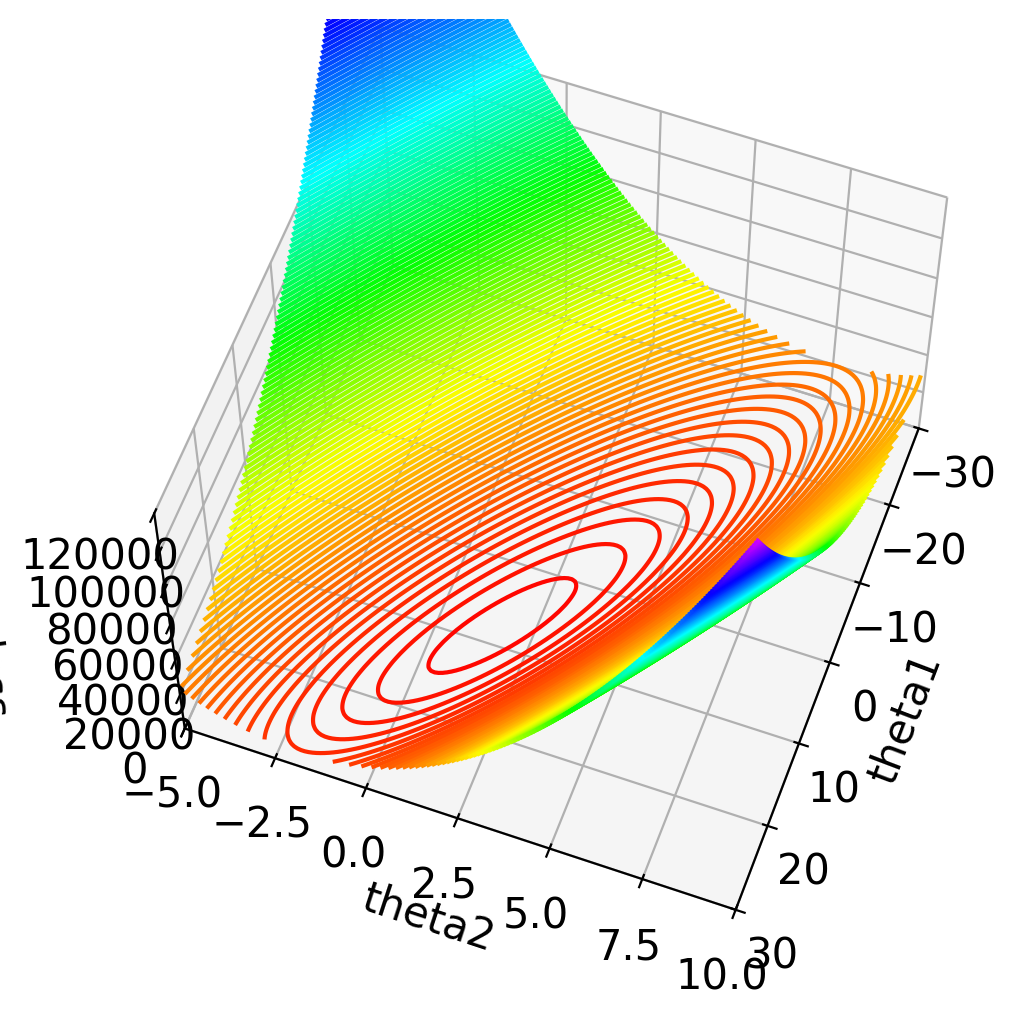

In [41]:
np.random.seed(10)
x = np.arange(10)
y =  6 + 2*x + np.random.normal(0, 5, 10)
def loss_function(theta1, theta2, x, y):
    # h(x[i]) = theta1 + theta2 * x[i]
    return (1/2* len(x)) * sum([(theta1 + theta2* x[i] - y[i])**2 for i in range(len(x))])

thetas1 = np.arange(-30, 30, 0.1)
thetas2 = np.arange(-5, 10, 0.1)

fig = plt.figure(figsize=(7,6),dpi=200)
ax = plt.axes(projection='3d')
X, Y = np.meshgrid(thetas1, thetas2)
Z = loss_function(X, Y, x, y)
ax.contour3D(X, Y, Z, 200, cmap = 'hsv')
ax.set_xlabel('theta1')
ax.set_ylabel('theta2')
ax.set_zlabel('\n' + 'loss', linespacing=4)
plt.xlim(-30, 30)
plt.ylim(-5, 10)
ax.set_zlim(-1, 120000)
ax.view_init(60, 20)

#### **Visualization of Gradient descent of Simple Linear Regression of Fuel Consumption vs Engine Size in 3D plot**

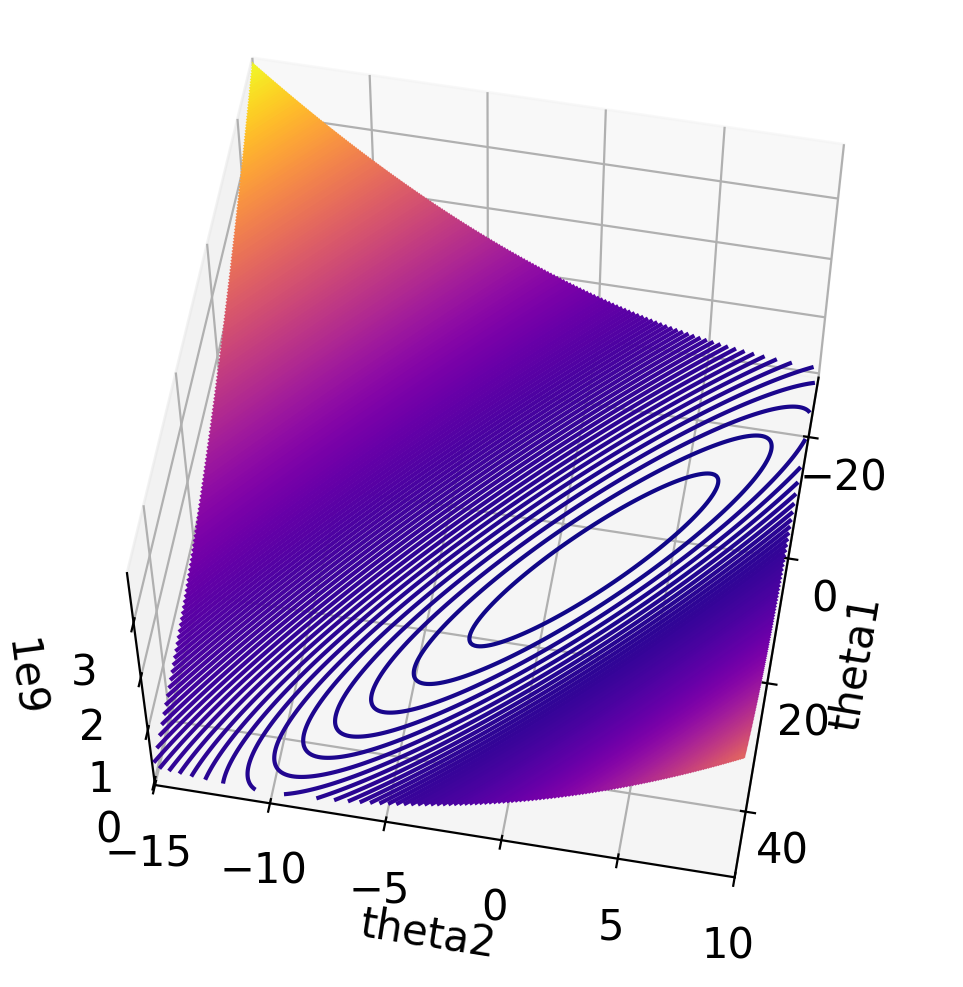

In [42]:
x = df['Engine Size(L)'].values
y = df['Fuel Consumption(Comb (L/100 km))'].values
thetas1 = np.arange(-30, 50, 0.1)
thetas2 = np.arange(-15, 10, 0.1)

fig = plt.figure(figsize=(7,6),dpi=200)
ax = plt.axes(projection='3d')
X, Y = np.meshgrid(thetas1, thetas2)
Z = loss_function(X, Y, x, y)
ax.contour3D(X, Y, Z, 200, cmap = 'plasma')
ax.set_xlabel('theta1')
ax.set_ylabel('theta2')
ax.set_zlabel('\n' + 'loss', linespacing=4)
plt.xlim(-30, 50)
plt.ylim(-15, 10)
ax.set_zlim()
ax.view_init(60, 10)

### **Cost function and Parameter Learning with Gradient Descent of Multiple Linear Regression using Engine size and Smog Rating as features and Fuel Consumption as target**

In [43]:
X = df[['Engine Size(L)', 'Smog Rating']].values
y = df[['Fuel Consumption(Comb (L/100 km))']].values
X1 = np.insert(X, 0, 1, axis=1)
X1.shape

(946, 3)

In [44]:
iters = 150
alpha = 0.0005
theta = gradientDescent(X1, y,alpha, iters)
theta

array([[0.30376001],
       [1.17398293],
       [1.19879281]])

The final equation obtained with the parameters obtained above is: 
<br>
$
y = 0.30376001 + 1.17398293 * x_1 + 1.19879281 * x_2
$

$ y = 0.30376001 + 1.17398293 * Engine Size(L) + 1.19879281 * Smog Rating $

## **Model Development: Multiple Linear Regression**<a name="Model"></a>
In this project, FUELCONSUMPTION_COMB is predicted  using 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type','CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating' of vehicles. 

In [45]:
X = df[['Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type','CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating']]
y = df[['Fuel Consumption(Comb (L/100 km))']]
X.head(2)

,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,0,2.4,4,7,3,200,6,3
1,7,3.5,6,8,3,263,4,5


### **Train/Test Split**
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit. It is important that the model developed have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. 
One way to improve out-of-sample accuracy is to use an evaluation approach called Train/Test Split. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive to train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that the outcome of each data point in this dataset is known, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Split the entire dataset into 80% for training, and the 20% for testing using train_test_split from sklearn model_selection

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (756, 8) (756, 1)
Test set: (190, 8) (190, 1)


In [47]:
from sklearn import linear_model
mlm = linear_model.LinearRegression()
mlm.fit (X_train, y_train)
#The value of the intercept (a)
print('The value of the intercept of mutiple linear regression model is: ', mlm.intercept_)
# The coefficients
print ('The Coefficients of mutiple linear regression model is: ', mlm.coef_)

The value of the intercept of mutiple linear regression model is:  [0.06231241]
The Coefficients of mutiple linear regression model is:  [[ 0.00066058  0.13549093 -0.01479244  0.00789365 -0.03712664  0.04138051
  -0.0418067   0.03372079]]


Plugging in the actual values to obtain the linear function.

$$
Fuel Consumption(Comb (L/100 km)) = 0.06231241 + 0.00066058 x  Vehicle Class + 0.13549093 x Engine Size(L) -0.01479244 x Cylinders + 0.00789365 x Transmission -0.03712664 x Fuel Type + 0.0413805 x CO2 Emissions(g/km) -0.0418067 x CO2 Rating +  0.03372079 x Smog Rating )
$$

## **Model Evaluation**<a name="Evaluation"></a>
Model evaluation is done by comparing the predicted values with the actual values and  the difference is used to calculate the accuracy of a regression model. 

There are different methods of model evaluation metrics as follows: 
<ul>
    <li> Mean absolute error: It is the mean of the absolute value of the errors.</li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.</li>
    <li> Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error. </li>
    <li> Residual: The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). 
    <li> Total sum of squares (tss): Sum of squares of difference between the mean value and the actual value.
    <li> Residual sum of squares (rss): Sum of residuals squared
    <li> R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
    
    R-squared: 1 - (rss/tss)
</ul>
<ul>
    <li> Explained Variance Score = 1 - [Variance(Ypredicted - Yactual) / Variance(Yactual)] </li>
    __explained variance regression score:__  
If $\hat{y}$ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
The best possible score is 1.0, lower values are worse.
</ul>

In [50]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

# Predictions
Yhat_mlm = mlm.predict(X_test)

# Variables
k = X_test.shape[1]  # Number of features
n = len(X_test)      # Number of samples

# Metrics
print('Mean Absolute Error (MAE) of Multiple Linear Regression:', metrics.mean_absolute_error(y_test, Yhat_mlm))
print('Mean Squared Error (MSE) of Multiple Linear Regression:', metrics.mean_squared_error(y_test, Yhat_mlm))
print('Root Mean Squared Error (RMSE) of Multiple Linear Regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_mlm)))

# Variance and Explained Variance
print('Variance Score of Multiple Linear Regression: %.2f' % mlm.score(X_train, y_train))
print('Explained Variance Score (EVS) of Multiple Linear Regression:', explained_variance_score(y_test, Yhat_mlm))

# Residual Sum of Squares (RSS)
print("Residual Sum of Squares of Multiple Linear Regression: %.2f" % np.mean((Yhat_mlm - y_test) ** 2))

# R2 Score
r2 = r2_score(y_test, Yhat_mlm)
print('R2 of Multiple Linear Regression:', r2)

# Use round() for rounding R2
print('R2 (rounded) of Multiple Linear Regression:', round(r2, 2))

# Adjusted R2 Score
adjusted_r2 = round((1 - (1 - r2) * (n - 1) / (n - k - 1)), 3)
print('Adjusted R2 of Multiple Linear Regression:', adjusted_r2)

# Accuracy
accuracy = mlm.score(X_test, y_test)
print("Accuracy of Multiple Linear Regression: {:.2f}".format(accuracy))

Mean Absolute Error (MAE) of Multiple Linear Regression: 0.21411980305447503
Mean Squared Error (MSE) of Multiple Linear Regression: 0.35268040897477826
Root Mean Squared Error (RMSE) of Multiple Linear Regression: 0.5938690166819434
Variance Score of Multiple Linear Regression: 0.94
Explained Variance Score (EVS) of Multiple Linear Regression: 0.9638669247653121
Residual Sum of Squares of Multiple Linear Regression: 0.35
R2 of Multiple Linear Regression: 0.9636159473257309
R2 (rounded) of Multiple Linear Regression: 0.96
Adjusted R2 of Multiple Linear Regression: 0.962
Accuracy of Multiple Linear Regression: 0.96


## **Model Enhancement**<a name = "Enhancement"></a>

#### **Summary statistics of Train set**

In [52]:
import statsmodels.api as sm
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Fuel Consumption(Comb (L/100 km))   R-squared:                       0.940
Model:                                           OLS   Adj. R-squared:                  0.940
Method:                                Least Squares   F-statistic:                     1468.
Date:                               Thu, 03 Apr 2025   Prob (F-statistic):               0.00
Time:                                       00:06:49   Log-Likelihood:                -789.30
No. Observations:                                756   AIC:                             1597.
Df Residuals:                                    747   BIC:                             1638.
Df Model:                                          8                                         
Covariance Type:                           nonrobust                                         
                          coef    std err          t      P>

### **Backward Elimination: Removing the least significant variable from the model**

From the statistics summary above, it seems the Engine size is not a statistically significant features of CO2 emission prediction. Backward Elimination is irrelevant in Python, because the Scikit-Learn library automatically takes care of selecting the statistically significant features when training the model to make accurate predictions. Eventhough that's the case trying for it just to make sure to see any improvement in accuracy. 

In [53]:
# Removing Vehicle Class Cylinders,CO2 Rating, and  Fuel Type  with very high p values of 0.924, 0.695, 0.498 and 0.358 respectively

X = df[['Engine Size(L)', 'Transmission', 'CO2 Emissions(g/km)', 'Smog Rating']]
y = df[['Fuel Consumption(Comb (L/100 km))']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
from sklearn import linear_model
mlm = linear_model.LinearRegression()
mlm.fit (X_train, y_train)

import statsmodels.api as sm
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Fuel Consumption(Comb (L/100 km))   R-squared:                       0.940
Model:                                           OLS   Adj. R-squared:                  0.940
Method:                                Least Squares   F-statistic:                     2946.
Date:                               Thu, 03 Apr 2025   Prob (F-statistic):               0.00
Time:                                       00:06:52   Log-Likelihood:                -790.14
No. Observations:                                756   AIC:                             1590.
Df Residuals:                                    751   BIC:                             1613.
Df Model:                                          4                                         
Covariance Type:                           nonrobust                                         
                          coef    std err          t      P>

### **Feature selection using Feature Importance**
Feature importance can be used to improve a predictive model. Feature importance refers to techniques to assign the importance score to input features based on how useful they are at predicting a target variable. Based on these scores those features with (lowest scores) can be deleted and those features with highest scores can be retained for predicting the output of the model. 

#### **Feature importance with Random samples**

In [54]:
# test regression dataset
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


Feature: 0, Score: 0.00000
Feature: 1, Score: -0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 71.39585
Feature: 5, Score: 59.18465
Feature: 6, Score: 53.33382
Feature: 7, Score: 37.60389
Feature: 8, Score: 3.35810
Feature: 9, Score: -0.00000


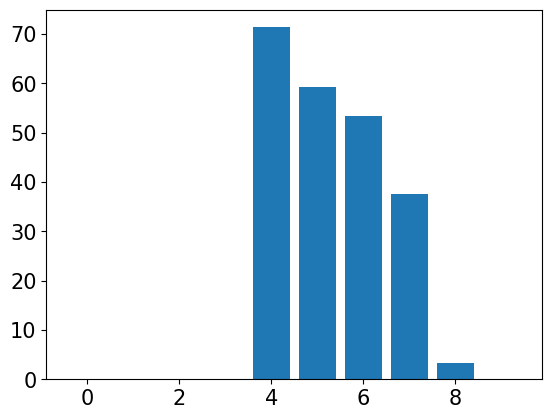

In [55]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=10000, n_features=10, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#### **Feature importance with the Fuel Consumption dataset**

Feature: 0, Score: 0.00066
Feature: 1, Score: 0.13549
Feature: 2, Score: -0.01479
Feature: 3, Score: 0.00789
Feature: 4, Score: -0.03713
Feature: 5, Score: 0.04138
Feature: 6, Score: -0.04181
Feature: 7, Score: 0.03372


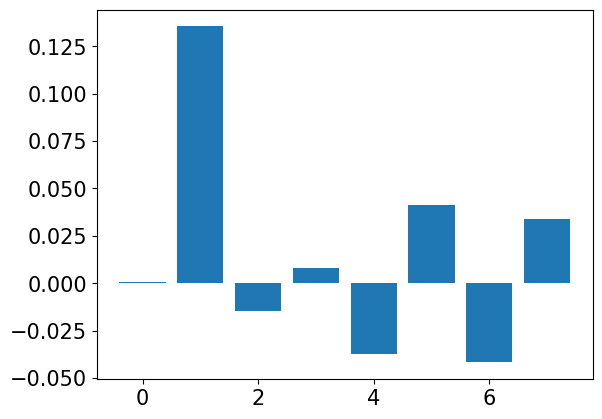

In [56]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X = df[['Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type','CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating']]
y = df['Fuel Consumption(Comb (L/100 km))']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
Features = ['Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type','CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating']

# define the model
model = LinearRegression()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

C:\Users\Priyanshu\AppData\Local\Temp\ipykernel_12428\1382239339.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x=Features, y=importance, palette = 'hsv')
C:\Users\Priyanshu\AppData\Local\Temp\ipykernel_12428\1382239339.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')


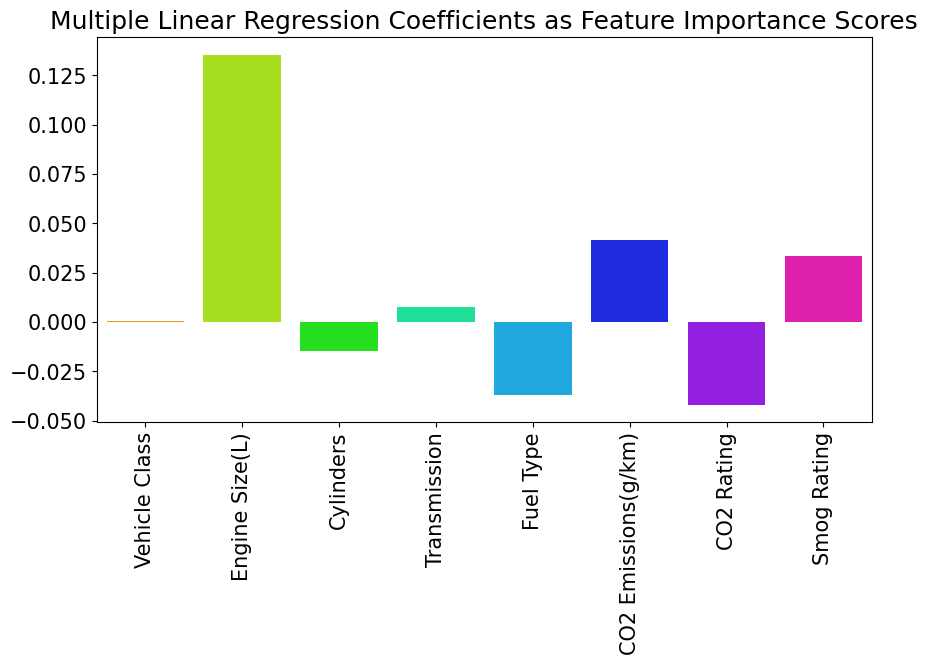

In [57]:
f, ax = plt.subplots(figsize=(10,5))
plot = sns.barplot(x=Features, y=importance, palette = 'hsv')
ax.set_title('Multiple Linear Regression Coefficients as Feature Importance Scores')
plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
plt.show()

In [58]:
# Sorting feature_importance values in descending order
FeatureImportance = pd.DataFrame(importance, columns = ["feature_importances"])
FeatureImportance['Features'] = Features
FeatureImportance = FeatureImportance[['Features','feature_importances']]
FeatureImportance

,Features,feature_importances
0,Vehicle Class,0.000661
1,Engine Size(L),0.135491
2,Cylinders,-0.014792
3,Transmission,0.007894
4,Fuel Type,-0.037127
5,CO2 Emissions(g/km),0.041381
6,CO2 Rating,-0.041807
7,Smog Rating,0.033721


C:\Users\Priyanshu\AppData\Local\Temp\ipykernel_12428\3427682782.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x='Features', y='feature_importances', data = FeatureImportance, palette = 'hsv')
C:\Users\Priyanshu\AppData\Local\Temp\ipykernel_12428\3427682782.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')


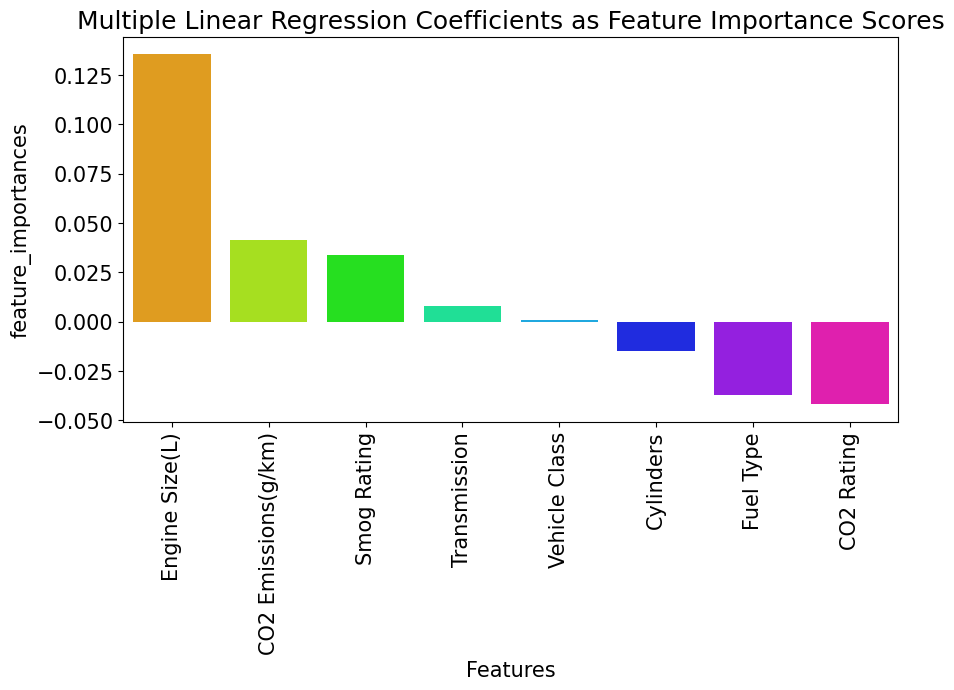

In [59]:
FeatureImportance = FeatureImportance.sort_values(by = 'feature_importances', ascending = False)
f, ax = plt.subplots(figsize=(10,5))
plot = sns.barplot(x='Features', y='feature_importances', data = FeatureImportance, palette = 'hsv')
ax.set_title('Multiple Linear Regression Coefficients as Feature Importance Scores')
plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
plt.show()

In [60]:
#The value of the intercept (a)
print('The value of the intercept of mutiple linear regression model is: ', mlm.intercept_)
# The coefficients
print ('The Coefficients of mutiple linear regression model is: ', mlm.coef_)

The value of the intercept of mutiple linear regression model is:  [-0.43037685]
The Coefficients of mutiple linear regression model is:  [[0.11680868 0.00633435 0.04216356 0.03478887]]


The value of the intercept $(\theta_0)$ of mutiple linear regression model is:  -0.43037685

The Coefficients $(\theta_1, \theta_2, \theta_3, \theta_4)$ of mutiple linear regression model for the four features namely,  Engine Size(L), Transmission, CO2 Emissions(g/km), Smog Rating $ (x_1, x_2, x_3 and x_4)$ are 0.11680868, 0.00633435, 0.04216356, 0.03478887


Plugging in the actual values to obtain the linear function.

$$
Fuel Consumption(Comb (L/100 km)) = -0.43037685 + 0.11680868 x  Engine Size(L) + 0.00633435 x Transmission + 0.04216356 x CO2 Emissions(g/km) + 0.03478887 x Smog Rating)
$$

In [62]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

# Selecting features based on feature importance and backward elimination
X = df[['Engine Size(L)', 'Transmission', 'CO2 Emissions(g/km)', 'Smog Rating']]
y = df[['Fuel Consumption(Comb (L/100 km))']]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Initialize and train the model
mlm = linear_model.LinearRegression()
mlm.fit(X_train, y_train)

# Make predictions
Yhat_mlm = mlm.predict(X_test)

# Metrics calculation
k = X_test.shape[1]  # Number of features
n = len(X_test)      # Number of samples

print('Mean Absolute Error (MAE) of Multiple Linear Regression:', metrics.mean_absolute_error(y_test, Yhat_mlm))
print('Mean Squared Error (MSE) of Multiple Linear Regression:', metrics.mean_squared_error(y_test, Yhat_mlm))
print('Root Mean Squared Error (RMSE) of Multiple Linear Regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_mlm)))

# Variance and Explained Variance Scores
print('Variance Score of Multiple Linear Regression: {:.2f}'.format(mlm.score(X_train, y_train)))
print('Explained Variance Score (EVS) of Multiple Linear Regression:', explained_variance_score(y_test, Yhat_mlm))

# Residual Sum of Squares (RSS)
print("Residual Sum of Squares of Multiple Linear Regression: {:.2f}".format(np.mean((Yhat_mlm - y_test) ** 2)))

# R2 Score
r2 = r2_score(y_test, Yhat_mlm)
print('R2 of Multiple Linear Regression:', r2)
print('R2 (rounded) of Multiple Linear Regression:', round(r2, 2))

# Adjusted R2 Score
adjusted_r2 = round((1 - (1 - r2) * (n - 1) / (n - k - 1)), 3)
print('Adjusted R2 of Multiple Linear Regression:', adjusted_r2)

# Accuracy (Score on Test Data)
accuracy = mlm.score(X_test, y_test)
print("Accuracy of Multiple Linear Regression: {:.2f}".format(accuracy))

Mean Absolute Error (MAE) of Multiple Linear Regression: 0.20703732828298604
Mean Squared Error (MSE) of Multiple Linear Regression: 0.3492988893905581
Root Mean Squared Error (RMSE) of Multiple Linear Regression: 0.5910151346543996
Variance Score of Multiple Linear Regression: 0.94
Explained Variance Score (EVS) of Multiple Linear Regression: 0.9642300944633578
Residual Sum of Squares of Multiple Linear Regression: 0.35
R2 of Multiple Linear Regression: 0.963964799667796
R2 (rounded) of Multiple Linear Regression: 0.96
Adjusted R2 of Multiple Linear Regression: 0.963
Accuracy of Multiple Linear Regression: 0.96


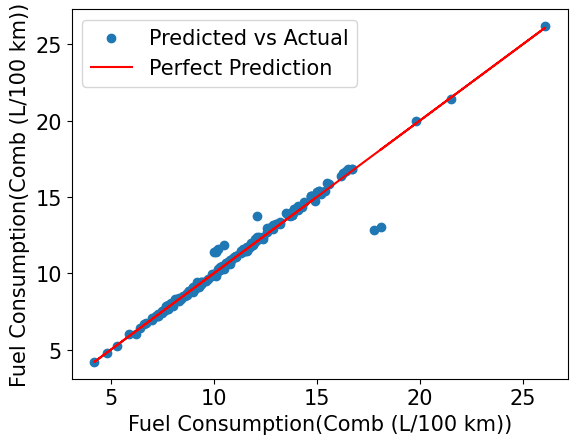

In [63]:
# Final predictions
plt.scatter(y_test, Yhat_mlm, label="Predicted vs Actual")

# Perfect predictions
plt.xlabel('Fuel Consumption(Comb (L/100 km))')
plt.ylabel('Fuel Consumption(Comb (L/100 km))')
plt.plot(y_test,y_test,'r', label="Perfect Prediction")
plt.legend();